### Importing Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math


### Initialization of parameters

In [2]:
mu_r = 2.0
epsilon_r = 6.0
mu_0 =1.25663706212E-6 
epsilon_0 =8.8541878128E-12
imp0 = np.sqrt(mu_0/epsilon_0)
delta_z = 0.004293 #converted from cm to m
N_z = 200
n_r = math.sqrt((mu_r*epsilon_r))
z = np.zeros((N_z,1))
#initialization of device parameters
Mu_r = np.ones((1,N_z))
Epsilon_r = np.ones((1,N_z))
print(Mu_r,Epsilon_r)
print(Mu_r.size,Epsilon_r.size)
#Adding the materials on the grid

Mu_r[:,13:83] = mu_r
Epsilon_r[:,13:83] = epsilon_r
print(Mu_r.shape,Epsilon_r.shape,z.shape)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1.]] [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1.

### Initial computations of relevant parameters

In [3]:
#Compute time step
c_0 =  299792458 #m/s
delta_t = (1*delta_z)/(2*c_0)
print(delta_t)

#Compute Source parameters
tau = 1/(2*1.5E9) #Width of gaussian pulse
t_0 = 4*tau     #offset in time for source
print(tau,t_0)

#Compute number of iterations
t_prop = (n_r*N_z*delta_z)/c_0
T = 12*tau + 5*t_prop
iteration = math.ceil(T/delta_t)
t = np.linspace(0,iteration*delta_t,iteration)
print(T,iteration,t.shape)

7.159953303428334e-12
3.333333333333333e-10 1.3333333333333333e-09
5.360561160543398e-08 7487 (7487,)


### Defining source excitation

In [4]:
def gaussian_source(t,t_0,tau,delta_t,delta_z,c_0):
    #Set source permittivity and permeability
    mu_src =1 #these parameters should be the material permittivity/permeability at the grid position of the source injection
    epsilon_src = 1
    n_src = np.sqrt(epsilon_src*mu_src)
    delta = (n_src*delta_z/2*c_0)+(delta_t/2)
    A = -np.sqrt(epsilon_src/mu_src)
    x = (t - t_0)/tau
    Esrc = np.exp(-np.power(x,2))
    Hsrc = A*np.exp(-np.power(x,2))
    return Esrc,Hsrc

### Source excitation initialization

(200, 1) (7487,) (7487,)
0.9999822561812666 0.0 -0.0 -0.9999822561812666


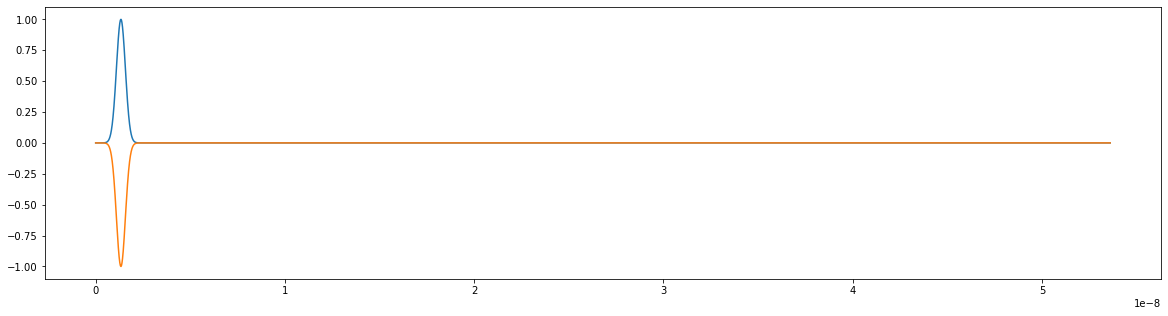

In [5]:
Esrc,Hsrc = gaussian_source(t,t_0,tau,delta_t,delta_z,c_0)
print(z.shape,Esrc.shape,Hsrc.shape)
plt.figure(figsize=[20,5])
plt.plot(t,Esrc)
plt.plot(t,Hsrc)
injection_point = 100
print(max(Esrc),min(Esrc),max(Hsrc),min(Hsrc))

### Main FDTD Loop (Basic Algorithm)

In this part, there is no excitation so n

In [ ]:
#FDTD Loop
#Creating Field values
E = np.zeros((1,N_z))
H_norm = np.zeros((1,N_z))

#Update coefficient values
m_E = c_0*delta_t/1
m_H = c_0*delta_t/1
E.shape,H_norm.shape
plt.figure(1)
#Update Equations (Looping in time)
for i in range(iteration):
    #Looping in space
    for j in range(N_z-1):
        H_norm[:,j] = H_norm[:,j] + m_H*((E[:,j+1] - E[:,j])/delta_z)
    #Boundary condition
    H_norm[:,N_z-1] = H_norm[:,N_z-1] + m_H*(-E[:,N_z-1]/delta_z)
    
    #Boundary condition
    E[:,0] = E[:,j] + m_E*((H_norm[:,j]-H_norm[:,j-1])/delta_z)
    #looping in space (Electric Field)
    for j in range(1,N_z):
        E[:,j] = E[:,j] + m_E*(H_norm[:,j]/delta_z)
    
    
    
    plt.plot(E.T)#Plot E-Field
    plt.plot(H_norm.T)#Plot H-Field
    plt.ylabel('Value')
    plt.xlabel('z (Space)')
    plt.title(f'FDTD 1-D Iteration step: {i}/{iteration}')
    plt.show()
    #lineE.set_xdata(z)
    #lineE[0].set_ydata(E[i].T)
    #lineH.set_xdata(z)
    ##lineH[0].set_ydata(H_norm[i].T)
    #plt.pause(1)
    #fig.show()
    
print(E.shape,H_norm.shape)
        

#### FDTD Loop (Algorithm with Soft source) with Dirichlet Boundary Condition

In [ ]:

#FDTD Loop
#Creating Field values
E = np.zeros((1,N_z))
H_norm = np.zeros((1,N_z))
#Update coefficient values
m_E = c_0*delta_t/1
m_H = c_0*delta_t/1
E.shape,H_norm.shape

E_plot = np.zeros([iteration,N_z])
H_norm_plot = np.zeros([iteration,N_z])
print(E_plot.shape, H_norm_plot.shape)


#Update Equations (Looping in time)
for i in range(iteration):
    #Looping in space
    for j in range(N_z-1):
        H_norm[:,j] = H_norm[:,j] + m_H*((E[:,j+1] - E[:,j])/delta_z)
        if j == injection_point: #Injecting the source
            H_norm[:,j] = H_norm[:,j] + Esrc[i]
    #Boundary condition
    H_norm[:,N_z-1] = H_norm[:,N_z-1] + m_H*(-E[:,N_z-1]/delta_z)
    
    #Boundary condition
    E[:,0] = E[:,j] + m_E*(H_norm[:,0]/delta_z)
    #looping in space (Electric Field)
    for j in range(1,N_z):
        E[:,j] = E[:,j] + m_E*((H_norm[:,j] - H_norm[:,j-1])/delta_z)
        if j == injection_point: #Injecting the source
            E[:,j] = E[:,j] + Hsrc[i]
    
    E_plot[i,:] = E
    H_norm_plot[i,:] = H_norm
    print("=============================================================")
    print(f"Successfully computed field values! Iteration {i}/{iteration}....")

#### FDTD Hard source with Dirichlet Boundary Condition

In [ ]:

#FDTD Loop
#Creating Field values
E = np.zeros((1,N_z))
H_norm = np.zeros((1,N_z))
#Update coefficient values
m_E = c_0*delta_t/1
m_H = c_0*delta_t/1
E.shape,H_norm.shape

E_plot = np.zeros([iteration,N_z])
H_norm_plot = np.zeros([iteration,N_z])
print(E_plot.shape, H_norm_plot.shape)


#Update Equations (Looping in time)
for i in range(iteration):
    #Looping in space
    for j in range(N_z-1):
        H_norm[:,j] = H_norm[:,j] + m_H*((E[:,j+1] - E[:,j])/delta_z)
        if j == injection_point - 1: #Injecting the source
            H_norm[:,j] =  Esrc[i]
    #Boundary condition
    H_norm[:,N_z-1] = H_norm[:,N_z-1] + m_H*(-E[:,N_z-1]/delta_z)
    
    #Boundary condition
    E[:,0] = E[:,0] + m_E*(H_norm[:,0]/delta_z)
    #looping in space (Electric Field)
    for j in range(1,N_z):
        E[:,j] = E[:,j] + m_E*((H_norm[:,j] - H_norm[:,j-1])/delta_z)
        if j == injection_point: #Injecting the source
            E[:,j] =  Hsrc[i]
    
    E_plot[i,:] = E
    H_norm_plot[i,:] = H_norm
    print("=============================================================")
    print(f"Successfully computed field values! Iteration {i}/{iteration}....")

#### 1D FDTD Soft Source (with ABC)

In [27]:

#FDTD Loop
#Creating Field values
E = np.zeros((1,N_z))
H_norm = np.zeros((1,N_z))
#Update coefficient values
m_E = c_0*delta_t/(1*delta_z)
m_H = c_0*delta_t/(1*delta_z)
E.shape,H_norm.shape

E_plot = np.zeros([iteration,N_z])
H_norm_plot = np.zeros([iteration,N_z])
print(E_plot.shape, H_norm_plot.shape)

#Initializing the perfect boundary condition..
e1 = 0
e2 = 0
e3 = 0 
h1 = 0
h2 = 0
h3 = 0

#Update Equations (Looping in time)
for i in range(iteration):
    
    #Looping in space
    for j in range(0,N_z-1):
        H_norm[:,j] = (H_norm[:,j] + m_H*((E[:,j+1] - E[:,j])))
                                          
    #Boundary condition
    H_norm[:,N_z-1] = (H_norm[:,N_z-1] + m_H*( e3-E[:,N_z-1]))
    h3=h2
    h2=h1
    h1=H_norm[:,0]
    
                                          
    #Boundary condition
    E[:,0] = E[:,0] + m_E*(H_norm[:,0]-h3)
    #looping in space (Electric Field)
    for j in range(1,N_z):
        E[:,j] = E[:,j] + m_E*((H_norm[:,j] - H_norm[:,j-1]))
    
    
    e3=e2
    e2=e1
    e1=E[:,N_z-1]
    
    E[:,injection_point] = E[:,injection_point] + Esrc[i]
    

    
    E_plot[i,:] = E
    H_norm_plot[i,:] = H_norm
    print("=============================================================")
    print(f"Successfully computed field values! Iteration {i}/{iteration}....")

(7487, 200) (7487, 200)


IndexError: index 200 is out of bounds for axis 1 with size 200

<IPython.core.display.Javascript object>


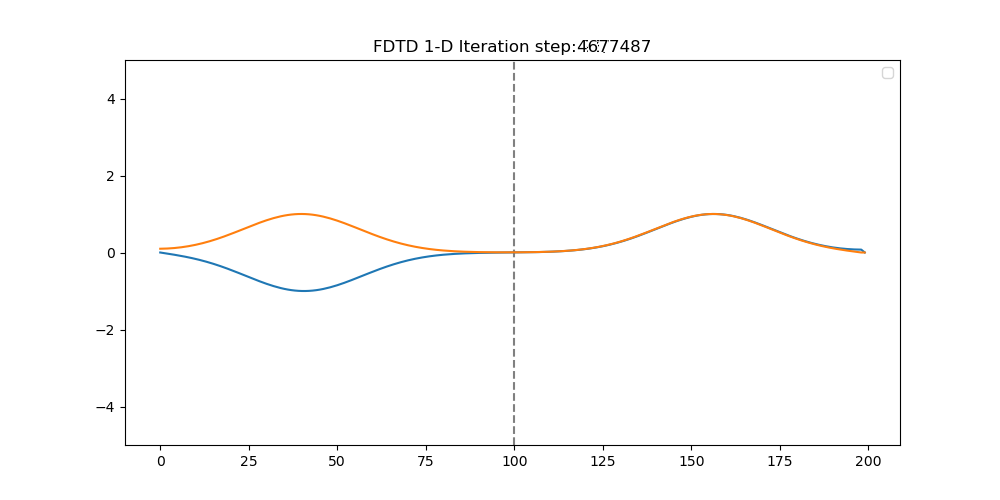

<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
    

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.11655139e-44,
       7.76240701e-42, 1.38112938e-39, 1.58830652e-37, 1.32703609e-35,
       8.58463191e-34, 4.47477093e-32, 1.93121642e-30, 7.03714377e-29,
       2.19693205e-27, 5.94242841e-26, 1.40489726e-24, 2.92323590e-23,
    

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.0000000

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.01850070e-50, 8.6139086

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.26156294e-51,
       5.53508044e-49, 1.18404755e-46, 1.6456659

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.88476838e-53, 3.55404250e-50, 7.81590133e-48,
       1.11755331e-45, 1.16816393e-43, 9.5162252

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.92798023e-54,
       2.28041232e-51, 5.15178720e-49, 7.57223947e-47, 8.14214591e-45,
       6.82800768e-43, 4.64912842e-41, 2.6420900

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.07998765e-55, 1.46221755e-52, 3.39108272e-50,
       5.11989256e-48, 5.65870739e-46, 4.88104043e-44, 3.42090815e-42,
       2.00260134e-40, 9.99012731e-39, 4.3116432

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.92499228e-56,
       9.36985879e-54, 2.22920852e-51, 3.45481469e-49, 3.92196619e-47,
       3.47699645e-45, 2.50630091e-43, 1.51005924e-41, 7.75889398e-40,
       3.45173491e-38, 1.34535604e-36, 4.6375281

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.20312017e-57, 6.00053616e-55, 1.46360145e-52,
       2.32680264e-50, 2.71118265e-48, 2.46858106e-46, 1.82870607e-44,
       1.13308778e-42, 5.99145623e-41, 2.74505347e-39, 1.10271643e-37,
       3.92079872e-36, 1.24340504e-34, 3.5392926

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.51950109e-59,
       3.84056912e-56, 9.59800046e-54, 1.56424768e-51, 1.86955251e-49,
       1.74708446e-47, 1.32911680e-45, 8.46275431e-44, 4.60147972e-42,
       2.16936925e-40, 8.97383608e-39, 3.28812954e-37, 1.07545191e-35,
       3.15979828e-34, 8.38390857e-33, 2.0177834

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.69968818e-60, 2.45675196e-57, 6.28707495e-55,
       1.04978439e-52, 1.28615158e-50, 1.23273742e-48, 9.62440691e-47,
       6.29272766e-45, 3.51571962e-43, 1.70421540e-41, 7.25338270e-40,
       2.73648613e-38, 9.22235421e-37, 2.79419323e-35, 7.65149000e-34,
       1.90217362e-32, 4.30930457e-31, 8.9249388

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.93730511e-61,
       1.57071763e-58, 4.11385448e-56, 7.03360785e-54, 8.82816100e-52,
       8.67320256e-50, 6.94469963e-48, 4.65948895e-46, 2.67296233e-44,
       1.33122816e-42, 5.82504933e-41, 2.26087779e-39, 7.84435638e-38,
       2.44863729e-36, 6.91356952e-35, 1.77356306e-33, 4.14966462e-32,
       8.88399303e-31, 1.74513625e-29, 3.1527826

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.83581570e-62, 1.00372831e-59, 2.68907302e-57,
       4.70513522e-55, 6.04667522e-53, 6.08552969e-51, 4.99428451e-49,
       3.43634128e-47, 2.02271963e-45, 1.03427689e-43, 4.64935421e-42,
       1.85505726e-40, 6.62087353e-39, 2.12747061e-37, 6.18784921e-36,
       1.63649311e-34, 3.95055771e-33, 8.73365901e-32, 1.77314022e-30,
       3.31387747e-29, 5.71294015e-28, 9.1004056

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.14738481e-63,
       6.41098811e-61, 1.75601910e-58, 3.14276776e-56, 4.13307279e-54,
       4.25873973e-52, 3.58014124e-50, 2.52460506e-48, 1.52383507e-46,
       7.99444482e-45, 3.68932784e-43, 1.51209622e-41, 5.54728366e-40,
       1.83340734e-38, 5.48864869e-37, 1.49514654e-35, 3.72048814e-34,
       8.48502920e-33, 1.77859154e-31, 3.43497939e-30, 6.12491372e-29,
       1.01011982e-27, 1.54309733e-26, 2.1862757

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.17115506e-65, 4.09292143e-62, 1.14563738e-59,
       2.09617256e-57, 2.81954121e-55, 2.97288350e-53, 2.55856455e-51,
       1.84801209e-49, 1.14311077e-47, 6.14907951e-46, 2.91126727e-44,
       1.22483772e-42, 4.61535769e-41, 1.56776999e-39, 4.82693469e-38,
       1.35322200e-36, 3.46796386e-35, 8.15157783e-34, 1.76245474e-32,
       3.51378785e-31, 6.47343927e-30, 1.10404047e-28, 1.74580833e-27,
       2.56292608e-26, 3.49683009e-25, 4.4380808

<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.48197191e-66,
       2.61185956e-63, 7.46747164e-61, 1.39618467e-58, 1.91985877e-56,
       2.07031179e-54, 1.82314041e-52, 1.34803275e-50, 8.54022783e-49,
       4.70758731e-47, 2.28511263e-45, 9.86235129e-44, 3.81445361e-42,
       1.33074000e-40, 4.21052078e-39, 1.21385870e-37, 3.20111890e-36,
       7.74825145e-35, 1.72637648e-33, 3.54964116e-32, 6.74974735e-31,
       1.18918837e-29, 1.94430372e-28, 2.95402863e-27, 4.17537703e-26,
       5.49559421e-25, 6.74061666e-24, 7.70910478e-23, 8.22450547e-22,
       8.18711050e-21, 7.60523726e-20, 6.59227970e-19, 5.33103448e-18,
       4.02053623e-17, 2.82634788e-16, 1.85069266e-15, 1.12779091e-14,
       6.38912800e-14, 3.36057325e-13, 1.63863264e-12, 7.39384488e-12,
       3.08089304e-11, 1.18264714e-10, 4.17062890e-10, 1.34689963e-09,
       3.96905342e-09, 1.06291551e-08, 2.57547487e-08, 5.62087839e-08,
    

<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 2.80123245e-67, 1.66602701e-64, 4.86322731e-62,
       9.28719739e-60, 1.30490750e-57, 1.43846304e-55, 1.29546542e-53,
       9.80044676e-52, 6.35563093e-50, 3.58792141e-48, 1.78454266e-46,
       7.89591404e-45, 3.13251832e-43, 1.12160509e-41, 3.64438467e-40,
       1.07960524e-38, 2.92742169e-37, 7.29061447e-36, 1.67253869e-34,
       3.54341923e-33, 6.94792531e-32, 1.26326941e-30, 2.13330322e-29,
       3.35066095e-28, 4.90053116e-27, 6.68067142e-26, 8.49597636e-25,
       1.00856085e-23, 1.11814272e-22, 1.15809319e-21, 1.12078323e-20,
       1.01355934e-19, 8.56407977e-19, 6.75937983e-18, 4.98141510e-17,
       3.42590464e-16, 2.19714911e-15, 1.31284641e-14, 7.30069302e-14,
       3.77350880e-13, 1.81006255e-12, 8.04329510e-12, 3.30421539e-11,
       1.25187201e-10, 4.36231914e-10, 1.39373123e-09, 4.06818482e-09,
       1.08058173e-08, 2.60063177e-08, 5.64621438e-08, 1.10160796e-07,
    

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 3.16455664e-63, 6.16986728e-61, 8.85404743e-59,
       9.97259120e-57, 9.18046175e-55, 7.10235649e-53, 4.71224960e-51,
       2.72287492e-49, 1.38687198e-47, 6.28715046e-46, 2.55689363e-44,
       9.38990011e-43, 3.13105597e-41, 9.52424950e-40, 2.65347064e-38,
       6.79409507e-37, 1.60350153e-35, 3.49736929e-34, 7.06502308e-33,
       1.32440974e-31, 2.30776293e-30, 3.74319657e-29, 5.65859476e-28,
       7.98065464e-27, 1.05100790e-25, 1.29334358e-24, 1.48798550e-23,
       1.60115446e-22, 1.61186645e-21, 1.5182305

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 5.99750833e-60, 6.89925883e-58, 6.48909463e-56,
       5.13130431e-54, 3.48133721e-52, 2.05793346e-50, 1.07281807e-48,
       4.98008966e-47, 2.07493652e-45, 7.81061767e-44, 2.67103479e-42,
       8.33729205e-41, 2.38487191e-39, 6.27336089e-38, 1.52204794e-36,
       3.41487626e-35, 7.10098244e-34, 1.37122576e-32, 2.46311348e-31,
       4.12176262e-30, 6.43358957e-29, 9.37698340e-28, 1.27733728e-26,
       1.62743980e-25, 1.94053175e-24, 2.16646282e-23, 2.26535162e-22,
       2.21899231e-21, 2.03627869e-20, 1.7504472

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 4.57499961e-57, 3.69637333e-55, 2.56315992e-53,
       1.54927168e-51, 8.26191151e-50, 3.92507724e-48, 1.67447256e-46,
       6.45704738e-45, 2.26320957e-43, 7.24430404e-42, 2.12618963e-40,
       5.74183850e-39, 1.43103916e-37, 3.30020016e-36, 7.05841447e-35,
       1.40286162e-33, 2.59546110e-32, 4.47670743e-31, 7.20794575e-30,
       1.08456879e-28, 1.52653447e-27, 2.01142428e-26, 2.48272669e-25,
       2.87212505e-24, 3.11523737e-23, 3.16884854e-22, 3.02335900e-21,
       2.70556477e-20, 2.27067394e-19, 1.7867947

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.88062664e-54, 1.16194535e-52, 6.33547293e-51,
       3.07876756e-49, 1.34410590e-47, 5.30664289e-46, 1.90525142e-44,
       6.25007143e-43, 1.88095619e-41, 5.21137781e-40, 1.33328821e-38,
       3.15820180e-37, 6.94225793e-36, 1.41899488e-34, 2.70174050e-33,
       4.79904484e-32, 7.96329105e-31, 1.23582321e-29, 1.79545107e-28,
       2.44402453e-27, 3.11926316e-26, 3.73469139e-25, 4.19662711e-24,
       4.42713482e-23, 4.38534797e-22, 4.07920821e-21, 3.56302830e-20,
       2.92189417e-19, 2.24900215e-18, 1.6241281

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 4.83696080e-52, 2.40385157e-50, 1.07341119e-48,
       4.33659757e-47, 1.59396944e-45, 5.35575062e-44, 1.65172906e-42,
       4.69205260e-41, 1.23145568e-39, 2.99407514e-38, 6.75935496e-37,
       1.41981344e-35, 2.77981338e-34, 5.08084694e-33, 8.68128324e-32,
       1.38826507e-30, 2.07990738e-29, 2.92197276e-28, 3.85199779e-27,
       4.76797785e-26, 5.54405991e-25, 6.05791350e-24, 6.22194498e-23,
       6.00752054e-22, 5.45306282e-21, 4.65290371e-20, 3.73129509e-19,
       2.81132475e-18, 1.98925634e-17, 1.3211657

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 8.52663606e-50, 3.52469290e-48, 1.32561825e-46,
       4.55958214e-45, 1.44018085e-43, 4.19208126e-42, 1.12796988e-40,
       2.81310105e-39, 6.51798120e-38, 1.40596819e-36, 2.82851099e-35,
       5.31556241e-34, 9.34442882e-33, 1.53848983e-31, 2.37482199e-30,
       3.43996712e-29, 4.67947767e-28, 5.98188631e-27, 7.18956103e-26,
       8.12767240e-25, 8.64486094e-24, 8.65286236e-23, 8.15094219e-22,
       7.22591582e-21, 6.02781887e-20, 4.73051453e-19, 3.49130965e-18,
       2.42215208e-17, 1.57868899e-16, 9.6597878

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.09547957e-47, 3.85756923e-46, 1.24721030e-44,
       3.71784761e-43, 1.02497135e-41, 2.62043328e-40, 6.22736424e-39,
       1.37850723e-37, 2.84762336e-36, 5.49824555e-35, 9.93683512e-34,
       1.68303202e-32, 2.67439726e-31, 3.99075001e-30, 5.59662050e-29,
       7.38131063e-28, 9.16051990e-27, 1.07023781e-25, 1.17750376e-24,
       1.22030882e-23, 1.19141342e-22, 1.09586517e-21, 9.49570131e-21,
       7.75000524e-20, 5.95617081e-19, 4.30885280e-18, 2.93276143e-17,
       1.87695142e-16, 1.12869711e-15, 6.3720469

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.07216224e-45, 3.27399751e-44, 9.24280142e-43,
       2.42092310e-41, 5.89722004e-40, 1.33879781e-38, 2.83784140e-37,
       5.62568881e-36, 1.04448517e-34, 1.81851443e-33, 2.97234840e-32,
       4.56530183e-31, 6.59458063e-30, 8.96521592e-29, 1.14775307e-27,
       1.38439998e-26, 1.57386164e-25, 1.68688938e-24, 1.70491587e-23,
       1.62500787e-22, 1.46063926e-21, 1.23800688e-20, 9.89262459e-20,
       7.45042983e-19, 5.28641224e-18, 3.53209820e-17, 2.22090337e-16,
       1.31320493e-15, 7.29568050e-15, 3.8044595

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 8.26465861e-44, 2.21898290e-42, 5.53733034e-41,
       1.28844206e-39, 2.80066030e-38, 5.69645909e-37, 1.08575685e-35,
       1.94178997e-34, 3.26216115e-33, 5.15313979e-32, 7.66081964e-31,
       1.07259702e-29, 1.41523470e-28, 1.76066807e-27, 2.06617276e-26,
       2.28789996e-25, 2.39105348e-24, 2.35876328e-23, 2.19656478e-22,
       1.93086075e-21, 1.60194815e-20, 1.25412167e-19, 9.26160984e-19,
       6.44923006e-18, 4.23231352e-17, 2.61590951e-16, 1.52166113e-15,
       8.32307959e-15, 4.27643492e-14, 2.0616118

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 5.14982354e-42, 1.22918970e-40, 2.73825435e-39,
       5.71084468e-38, 1.11671501e-36, 2.05006784e-35, 3.53736109e-34,
       5.74270345e-33, 8.77938459e-32, 1.26489913e-30, 1.71861042e-29,
       2.20327848e-28, 2.66642810e-27, 3.04730818e-26, 3.28963081e-25,
       3.35507575e-24, 3.23313973e-23, 2.94387218e-22, 2.53252534e-21,
       2.05806601e-20, 1.57952727e-19, 1.14448240e-18, 7.82556296e-18,
       5.04676631e-17, 3.06776605e-16, 1.75635938e-15, 9.46245251e-15,
       4.79238811e-14, 2.27904563e-13, 1.0163215

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 2.64856798e-40, 5.67070668e-39, 1.13690006e-37,
       2.14101725e-36, 3.79177796e-35, 6.32180261e-34, 9.93138173e-33,
       1.47127498e-31, 2.05679552e-30, 2.71490787e-29, 3.38530511e-28,
       3.98925430e-27, 4.44397110e-26, 4.68094874e-25, 4.66274003e-24,
       4.39257394e-23, 3.91343335e-22, 3.29695108e-21, 2.62603922e-20,
       1.97699376e-19, 1.40626605e-18, 9.44692073e-18, 5.99009441e-17,
       3.58271761e-16, 2.01973075e-15, 1.07223625e-14, 5.35501477e-14,
       2.51303508e-13, 1.10669915e-12, 4.5667017

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.14362733e-38, 2.21283322e-37, 4.01978925e-36,
       6.87809960e-35, 1.10956187e-33, 1.68891440e-32, 2.42742381e-31,
       3.29633222e-30, 4.23144368e-29, 5.13694074e-28, 5.89967586e-27,
       6.41169501e-26, 6.59503970e-25, 6.42105534e-24, 5.91766760e-23,
       5.16210331e-22, 4.26164590e-21, 3.32897274e-20, 2.45978454e-19,
       1.71859005e-18, 1.13483124e-17, 7.07828618e-17, 4.16747366e-16,
       2.31434610e-15, 1.21117261e-14, 5.96707966e-14, 2.76433186e-13,
       1.20259091e-12, 4.90565373e-12, 1.8732490

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 7.06980640e-38, 1.30358990e-36, 2.25910635e-35,
       3.69204275e-34, 5.69500100e-33, 8.29720840e-32, 1.14249014e-30,
       1.48759953e-29, 1.83242134e-28, 2.13612429e-27, 2.35727657e-26,
       2.46299880e-25, 2.43691736e-24, 2.28328698e-23, 2.02586441e-22,
       1.70193975e-21, 1.35357338e-20, 1.01884558e-19, 7.25559480e-19,
       4.88638132e-18, 3.11045108e-17, 1.87029899e-16, 1.06153736e-15,
       5.68240820e-15, 2.86606453e-14, 1.36057202e-13, 6.07157125e-13,
       2.54340848e-12, 9.98572914e-12, 3.6679063

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 2.40994986e-36, 4.05242932e-35, 6.41605339e-34,
       9.60011975e-33, 1.35839814e-31, 1.81870155e-30, 2.30507199e-29,
       2.76672122e-28, 3.14585815e-27, 3.38928104e-26, 3.46051169e-25,
       3.34869146e-24, 3.07127154e-23, 2.66958715e-22, 2.19884863e-21,
       1.71585981e-20, 1.26817683e-19, 8.87423265e-19, 5.87678398e-18,
       3.68106057e-17, 2.17949514e-16, 1.21890521e-15, 6.43352351e-15,
       3.20165752e-14, 1.50062887e-13, 6.61617738e-13, 2.74012446e-12,
       1.06433883e-11, 3.87050720e-11, 1.3151387

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.33254898e-35, 2.14390720e-34, 3.25007525e-33,
       4.66061111e-32, 6.32566878e-31, 8.13007698e-30, 9.89880511e-29,
       1.14212159e-27, 1.24908590e-26, 1.29508978e-25, 1.27315435e-24,
       1.18672734e-23, 1.04880260e-22, 8.78744320e-22, 6.97876600e-21,
       5.25207507e-20, 3.74433411e-19, 2.52772440e-18, 1.61502560e-17,
       9.76039835e-17, 5.57565701e-16, 3.00830362e-15, 1.53162372e-14,
       7.35091535e-14, 3.32188764e-13, 1.41160400e-12, 5.63226927e-12,
       2.10656382e-11, 7.37183661e-11, 2.4086720

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 3.67666450e-34, 5.43342948e-33, 7.57479236e-32,
       1.00056879e-30, 1.25284130e-29, 1.48755139e-28, 1.67531676e-27,
       1.79003863e-26, 1.81480431e-25, 1.74594625e-24, 1.59392482e-23,
       1.38074447e-22, 1.13477558e-21, 8.84646835e-21, 6.53994056e-20,
       4.58320832e-19, 3.04348499e-18, 1.91406343e-17, 1.13936958e-16,
       6.41496921e-16, 3.41350453e-15, 1.71509659e-14, 8.12854092e-14,
       3.62968140e-13, 1.52506560e-12, 6.02052228e-12, 2.22940234e-11,
       7.72942729e-11, 2.50386367e-10, 7.5609089

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 8.91088761e-33, 1.21445387e-31, 1.56270585e-30,
       1.90792636e-29, 2.21094400e-28, 2.43237366e-27, 2.54094218e-26,
       2.52068272e-25, 2.37475700e-24, 2.12465390e-23, 1.80504175e-22,
       1.45596016e-21, 1.11475267e-20, 8.09929988e-20, 5.58210221e-19,
       3.64785540e-18, 2.25912371e-17, 1.32507548e-16, 7.35588521e-16,
       3.86167014e-15, 1.91543048e-14, 8.96730962e-14, 3.95785065e-13,
       1.64472173e-12, 6.42578545e-12, 2.35639861e-11, 8.09585504e-11,
       2.60061970e-10, 7.79287819e-10, 2.1728268

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.91170142e-31, 2.41127512e-30, 2.87297555e-29,
       3.25177929e-28, 3.49715821e-27, 3.57417316e-26, 3.47164832e-25,
       3.20481074e-24, 2.81161080e-23, 2.34393969e-22, 1.85652368e-21,
       1.39673241e-20, 9.97816865e-20, 6.76626177e-19, 4.35321477e-18,
       2.65584943e-17, 1.53553952e-16, 8.40766889e-16, 4.35609800e-15,
       2.13368996e-14, 9.87029753e-14, 4.30717435e-13, 1.77073885e-12,
       6.84833410e-12, 2.48757808e-11, 8.47108927e-11, 2.69892001e-10,
       8.02688172e-10, 2.22291616e-09, 5.7164820

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 3.65489584e-30, 4.27970975e-29, 4.73487192e-28,
       4.98128737e-27, 4.98401197e-26, 4.74288263e-25, 4.29266707e-24,
       3.69490473e-23, 3.02422296e-22, 2.35328910e-21, 1.74050934e-20,
       1.22314230e-19, 8.16407688e-19, 5.17326801e-18, 3.11039441e-17,
       1.77332175e-16, 9.58013734e-16, 4.90023513e-15, 2.37097312e-14,
       1.08406360e-13, 4.67843496e-13, 1.90328175e-12, 7.28843589e-12,
       2.62296439e-11, 8.85509737e-11, 2.79874466e-10, 8.26287245e-10,
       2.27312677e-09, 5.81123307e-09, 1.3766025

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 6.26417574e-29, 6.82824662e-28, 7.03212720e-27,
       6.89237013e-26, 6.42966334e-25, 5.70862354e-24, 4.82345955e-23,
       3.87797516e-22, 2.96605749e-21, 2.15756749e-20, 1.49215407e-19,
       9.80736429e-19, 6.12314220e-18, 3.62945187e-17, 2.04116730e-16,
       1.08836735e-15, 5.49767887e-15, 2.62841107e-14, 1.18815092e-13,
       5.07241779e-13, 2.04251352e-12, 7.74635090e-12, 2.76257949e-11,
       9.24784488e-11, 2.90007397e-10, 8.50080472e-10, 2.32345315e-09,
       5.90574336e-09, 1.39202143e-08, 3.0337334

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 9.67547100e-28, 9.84207020e-27, 9.45577659e-26,
       8.65195594e-25, 7.53953441e-24, 6.25662694e-23, 4.94343690e-22,
       3.71803056e-21, 2.66114312e-20, 1.81193952e-19, 1.17316653e-18,
       7.21948604e-18, 4.22028336e-17, 2.34201337e-16, 1.23292386e-15,
       6.15217761e-15, 2.90716749e-14, 1.29961519e-13, 5.48991046e-13,
       2.18859545e-12, 8.22233171e-12, 2.90644369e-11, 9.64929564e-11,
       3.00288845e-10, 8.74063425e-10, 2.37388998e-09, 6.00001441e-09,
       1.40734910e-08, 3.05465544e-08, 6.1186683

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.35311297e-26, 1.28726661e-25, 1.15598666e-24,
       9.89210075e-24, 8.06603483e-23, 6.26597130e-22, 4.63627758e-21,
       3.26643275e-20, 2.19051020e-19, 1.39765578e-18, 8.48057235e-18,
       4.89074791e-17, 2.67899602e-16, 1.39283832e-15, 6.86763129e-15,
       3.20843808e-14, 1.41878469e-13, 5.93170226e-13, 2.34168699e-12,
       8.71662348e-12, 3.05457568e-11, 1.00594119e-10, 3.10716885e-10,
       8.98231805e-10, 2.42443222e-09, 6.09404789e-09, 1.42258766e-08,
       3.07542782e-08, 6.14093786e-08, 1.1302983

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.72055093e-25, 1.53382506e-24, 1.28966753e-23,
       1.03376959e-22, 7.89914617e-22, 5.75224983e-21, 3.99081839e-20,
       2.63689214e-19, 1.65859832e-18, 9.92640346e-18, 5.64933151e-17,
       3.05545698e-16, 1.56932586e-15, 7.64809172e-15, 3.53345003e-14,
       1.54599232e-13, 6.39858370e-13, 2.50194565e-12, 9.22946406e-12,
       3.20699268e-11, 1.04781545e-10, 3.21289616e-10, 9.22581442e-10,
       2.47507503e-09, 6.18784552e-09, 1.43773915e-08, 3.09605471e-08,
       6.16310473e-08, 1.13189102e-07, 1.9170584

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.99664709e-24, 1.67090655e-23, 1.31743772e-22,
       9.90594207e-22, 7.10234526e-21, 4.85411074e-20, 3.16122154e-19,
       1.96085874e-18, 1.15788193e-17, 6.50517672e-17, 3.47495025e-16,
       1.76366267e-15, 8.49776276e-15, 3.88346143e-14, 1.68157530e-13,
       6.89134593e-13, 2.66952699e-12, 9.76108409e-12, 3.36371041e-11,
       1.09054828e-10, 3.32005161e-10, 9.47108287e-10, 2.52581383e-09,
       6.28140912e-09, 1.45280553e-08, 3.11654010e-08, 6.18517168e-08,
       1.13349803e-07, 1.91738041e-07, 3.0016240

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 2.12176820e-23, 1.66949527e-22, 1.23600606e-21,
       8.72852617e-21, 5.87881097e-20, 3.77484623e-19, 2.30980761e-18,
       1.34616082e-17, 7.46811251e-17, 3.94124863e-16, 1.97718700e-15,
       9.42100027e-15, 4.25976070e-14, 1.82587499e-13, 7.41078026e-13,
       2.84458455e-12, 1.03117071e-11, 3.52474318e-11, 1.13413552e-10,
       3.42861668e-10, 9.71808411e-10, 2.57664424e-09, 6.37474058e-09,
       1.46778870e-08, 3.13688785e-08, 6.20714137e-08, 1.13511881e-07,
       1.91775435e-07, 3.00110790e-07, 4.3845485

<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 6.69843907e-23, 5.11349994e-22, 3.67010456e-21,
       2.51278399e-20, 1.64092614e-19, 1.02164205e-18, 6.06142742e-18,
       3.42515034e-17, 1.84223347e-16, 9.42472939e-16, 4.58263853e-15,
       2.11596917e-14, 9.26898502e-14, 3.84786297e-13, 1.51201344e-12,
       5.61652439e-12, 1.96933771e-11, 6.50742008e-11, 2.02280298e-10,
       5.90327461e-10, 1.61391360e-09, 4.12367279e-09, 9.82199397e-09,
       2.17509468e-08, 4.46679390e-08, 8.48775872e-08, 1.49053318e-07,
       2.42121446e-07, 3.65583263e-07, 5.18978789e-07, 7.06566455e-07,
       9.47019015e-07, 1.27817623e-06, 1.74917192e-06, 2.40450945e-06,
       3.28007506e-06, 4.42626078e-06, 5.94067235e-06, 7.97062622e-06,
       1.06814635e-05, 1.42475623e-05, 1.89043731e-05, 2.50003778e-05,
       3.29763076e-05, 4.33353269e-05, 5.67098174e-05, 7.39521706e-05,
       9.61210781e-05, 1.24468763e-04, 1.60567125e-04, 2.06411912e-04,
    

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 6.27247138e-22, 4.51168272e-21, 3.04578830e-20,
       1.96158588e-19, 1.20503791e-18, 7.05781143e-18, 3.93890522e-17,
       2.09337664e-16, 1.05872588e-15, 5.09151382e-15, 2.32628193e-14,
       1.00881792e-13, 4.14796755e-13, 1.61516373e-12, 5.94822064e-12,
       2.06878775e-11, 6.78428921e-11, 2.09401319e-10, 6.07139489e-10,
       1.65004438e-09, 4.19355944e-09, 9.94170680e-09, 2.19280785e-08,
       4.48848450e-08, 8.50788808e-08, 1.49162339e-07, 2.42108754e-07,
       3.65566628e-07, 5.19254641e-07, 7.0744563

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 5.41641007e-21, 3.67542904e-20, 2.33608377e-19,
       1.41644867e-18, 8.19199349e-18, 4.51664687e-17, 2.37251756e-16,
       1.18649704e-15, 5.64482549e-15, 2.55261992e-14, 1.09611866e-13,
       4.46481614e-13, 1.72311079e-12, 6.29246060e-12, 2.17119558e-11,
       7.06732944e-11, 2.16632587e-10, 6.24108846e-10, 1.68631893e-09,
       4.26340763e-09, 1.00609357e-08, 2.21041263e-08, 4.51004769e-08,
       8.52800924e-08, 1.49274331e-07, 2.42102233e-07, 3.65555035e-07,
       5.19526584e-07, 7.08309287e-07, 9.4996113

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 4.32316224e-20, 2.77067808e-19, 1.65938560e-18,
       9.47941250e-18, 5.16469830e-17, 2.68207020e-16, 1.32664158e-15,
       6.24536702e-15, 2.79581757e-14, 1.18902586e-13, 4.79894716e-13,
       1.83596498e-12, 6.64942443e-12, 2.27657949e-11, 7.35653102e-11,
       2.23973096e-10, 6.41232863e-10, 1.72273319e-09, 4.33321549e-09,
       1.01796892e-08, 2.22791166e-08, 4.53148687e-08, 8.54812185e-08,
       1.49389193e-07, 2.42101707e-07, 3.65548440e-07, 5.19794973e-07,
       7.09158043e-07, 9.51411135e-07, 1.2830098

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 3.19605928e-19, 1.93657233e-18, 1.09366599e-17,
       5.88983629e-17, 3.02459260e-16, 1.48005549e-15, 6.89603328e-15,
       3.05673031e-14, 1.28776790e-13, 5.15090086e-13, 1.95383574e-12,
       7.01928821e-12, 2.38495686e-11, 7.65188298e-11, 2.31421847e-10,
       6.58508934e-10, 1.75928325e-09, 4.40298125e-09, 1.02979755e-08,
       2.24530750e-08, 4.55280536e-08, 8.56822560e-08, 1.49506828e-07,
       2.42107006e-07, 3.65546796e-07, 5.20060144e-07, 7.09992495e-07,
       9.52847159e-07, 1.28463859e-06, 1.7541982

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 2.19261572e-18, 1.25724938e-17, 6.69917424e-17,
       3.40278917e-16, 1.64767625e-15, 7.59982079e-15, 3.33623429e-14,
       1.39257623e-13, 5.52121898e-13, 2.07683156e-12, 7.40222400e-12,
       2.49634414e-11, 7.95337325e-11, 2.38977842e-10, 6.75934506e-10,
       1.79596533e-09, 4.47270333e-09, 1.04158028e-08, 2.26260261e-08,
       4.57400631e-08, 8.58832019e-08, 1.49627144e-07, 2.42117967e-07,
       3.65550052e-07, 5.20322412e-07, 7.10813217e-07, 9.54269277e-07,
       1.28627410e-06, 1.75553984e-06, 2.4099912

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.39819408e-17, 7.59338138e-17, 3.81940606e-16,
       1.83048181e-15, 8.35982753e-15, 3.63522606e-14, 1.50368527e-13,
       5.91044448e-13, 2.20505996e-12, 7.79839986e-12, 2.61075689e-11,
       8.26098867e-11, 2.46640089e-10, 6.93507089e-10, 1.83277579e-09,
       4.54238024e-09, 1.05331792e-08, 2.27979936e-08, 4.59509278e-08,
       8.60840538e-08, 1.49750052e-07, 2.42134431e-07, 3.65558157e-07,
       5.20582070e-07, 7.11620763e-07, 9.55677588e-07, 1.28791536e-06,
       1.75691274e-06, 2.41116057e-06, 3.2920148

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 8.29983890e-17, 4.27249709e-16, 2.02941079e-15,
       9.17924001e-15, 3.95462200e-14, 1.62133226e-13, 6.31912122e-13,
       2.33862742e-12, 8.20797990e-12, 2.72820982e-11, 8.57471511e-11,
       2.54407603e-10, 7.11224242e-10, 1.86971111e-09, 4.61201061e-09,
       1.06501123e-08, 2.29690007e-08, 4.61606771e-08, 8.62848094e-08,
       1.49875468e-07, 2.42156249e-07, 3.65571057e-07, 5.20839394e-07,
       7.12415666e-07, 9.57072213e-07, 1.28956140e-06, 1.75831557e-06,
       2.41235591e-06, 3.29391486e-06, 4.4528994

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 4.59230512e-16, 2.24229421e-15, 1.00607819e-14,
       4.29534860e-14, 1.74575700e-13, 6.74779372e-13, 2.47763938e-12,
       8.63112431e-12, 2.84871682e-11, 8.89453746e-11, 2.62279402e-10,
       7.29083585e-10, 1.90676790e-09, 4.68159321e-09, 1.07666098e-08,
       2.31390696e-08, 4.63693394e-08, 8.64854666e-08, 1.50003313e-07,
       2.42183274e-07, 3.65588699e-07, 5.21094644e-07, 7.13198437e-07,
       9.58453288e-07, 1.29121130e-06, 1.75974699e-06, 2.41357764e-06,
       3.29579734e-06, 4.45648020e-06, 5.9826149

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 2.37103067e-15, 1.09882128e-14, 4.65799008e-14,
       1.87719533e-13, 7.19700571e-13, 2.62220021e-12, 9.06798940e-12,
       2.97229095e-11, 9.22043974e-11, 2.70254514e-10, 7.47082786e-10,
       1.94394288e-09, 4.75112689e-09, 1.08826792e-08, 2.33082219e-08,
       4.65769420e-08, 8.66860239e-08, 1.50133509e-07, 2.42215366e-07,
       3.65611025e-07, 5.21348060e-07, 7.13969571e-07, 9.59820969e-07,
       1.29286422e-06, 1.76120574e-06, 2.41482610e-06, 3.29766502e-06,
       4.46000910e-06, 5.98782991e-06, 8.0203478

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.14341200e-14, 5.03239550e-14, 2.01566965e-13,
       7.66725969e-13, 2.77241241e-12, 9.51872750e-12, 3.09894450e-11,
       9.55240515e-11, 2.78331972e-10, 7.65219567e-10, 1.98123289e-09,
       4.82061060e-09, 1.09983278e-08, 2.34764784e-08, 4.67835112e-08,
       8.68864797e-08, 1.50265982e-07, 2.42252389e-07, 3.65637980e-07,
       5.21599873e-07, 7.14729542e-07, 9.61175420e-07, 1.29451938e-06,
       1.76269056e-06, 2.41610147e-06, 3.29952044e-06, 4.46348786e-06,
       5.99302565e-06, 8.02624783e-06, 1.0740918

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 5.15430334e-14, 2.15554457e-13, 8.15785562e-13,
       2.92835295e-12, 9.98348243e-12, 3.22868893e-11, 9.89041608e-11,
       2.86510816e-10, 7.83491702e-10, 2.01863489e-09, 4.89004341e-09,
       1.11135627e-08, 2.36438593e-08, 4.69890726e-08, 8.70868327e-08,
       1.50400662e-07, 2.42294214e-07, 3.65669506e-07, 5.21850293e-07,
       7.15478807e-07, 9.62516823e-07, 1.29617606e-06, 1.76420022e-06,
       2.41740387e-06, 3.30136601e-06, 4.46691833e-06, 5.99819933e-06,
       8.03220474e-06, 1.07471864e-05, 1.4340025

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 2.17325519e-13, 8.64027473e-13, 3.08947227e-12,
       1.04622601e-11, 3.36153218e-11, 1.02344536e-10, 2.94790093e-10,
       8.01897013e-10, 2.05614592e-09, 4.95942445e-09, 1.12283910e-08,
       2.38103841e-08, 4.71936507e-08, 8.72870819e-08, 1.50537481e-07,
       2.42340715e-07, 3.65705545e-07, 5.22099523e-07, 7.16217804e-07,
       9.63845365e-07, 1.29783357e-06, 1.76573355e-06, 2.41873332e-06,
       3.30320397e-06, 4.47030241e-06, 6.00334847e-06, 8.03821371e-06,
       1.07535245e-05, 1.43480678e-05, 1.9052804

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 8.57483812e-13, 3.24244544e-12, 1.09520227e-11,
       3.49741254e-11, 1.05844834e-10, 3.03168828e-10, 8.20433364e-10,
       2.09376313e-09, 5.02875293e-09, 1.13428196e-08, 2.39760719e-08,
       4.73972693e-08, 8.74872263e-08, 1.50676376e-07, 2.42391770e-07,
       3.65746039e-07, 5.22347748e-07, 7.16946957e-07, 9.65161243e-07,
       1.29949130e-06, 1.76728940e-06, 2.42008978e-06, 3.30503641e-06,
       4.47364204e-06, 6.00847091e-06, 8.04426996e-06, 1.07599337e-05,
       1.43560877e-05, 1.90645455e-05, 2.5200875

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 3.16697367e-12, 1.13949023e-11, 3.63488592e-11,
       1.09401384e-10, 3.11645292e-10, 8.39098501e-10, 2.13148375e-09,
       5.09802816e-09, 1.14568550e-08, 2.41409411e-08, 4.75999513e-08,
       8.76872652e-08, 1.50817283e-07, 2.42447263e-07, 3.65790929e-07,
       5.22595147e-07, 7.17666671e-07, 9.66464664e-07, 1.30114868e-06,
       1.76886665e-06, 2.42147312e-06, 3.30686531e-06, 4.47693922e-06,
       6.01356477e-06, 8.05036882e-06, 1.07664143e-05, 1.43640932e-05,
       1.90761894e-05, 2.52166009e-05, 3.3222440

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.09501759e-11, 3.75051041e-11, 1.12951781e-10,
       3.20202845e-10, 8.57886602e-10, 2.16930424e-09, 5.16724930e-09,
       1.15705040e-08, 2.43050093e-08, 4.78017189e-08, 8.78871982e-08,
       1.50960144e-07, 2.42507081e-07, 3.65840158e-07, 5.22841883e-07,
       7.18377337e-07, 9.67755837e-07, 1.30280517e-06, 1.77046424e-06,
       2.42288316e-06, 3.30869248e-06, 4.48019593e-06, 6.01862848e-06,
       8.05650575e-06, 1.07729662e-05, 1.43720915e-05, 1.90877396e-05,
       2.52323073e-05, 3.32410662e-05, 4.3664362

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 3.54432706e-11, 1.15608657e-10, 3.28591319e-10,
       8.76729054e-10, 2.20720506e-09, 5.23641170e-09, 1.16837719e-08,
       2.44682938e-08, 4.80025936e-08, 8.80870246e-08, 1.51104901e-07,
       2.42571115e-07, 3.65893666e-07, 5.23088112e-07, 7.19079330e-07,
       9.69034977e-07, 1.30446028e-06, 1.77208111e-06, 2.42431967e-06,
       3.31051964e-06, 4.48341418e-06, 6.02366069e-06, 8.06267639e-06,
       1.07795889e-05, 1.43800895e-05, 1.90992002e-05, 2.52479853e-05,
       3.32598086e-05, 4.36862675e-05, 5.7179948

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.07369296e-10, 3.33669650e-10, 8.94688768e-10,
       2.24491911e-09, 5.30544356e-09, 1.17966468e-08, 2.46308067e-08,
       4.82025951e-08, 8.82867441e-08, 1.51251499e-07, 2.42639261e-07,
       3.65951396e-07, 5.23333978e-07, 7.19773012e-07, 9.70302304e-07,
       1.30611356e-06, 1.77371627e-06, 2.42578238e-06, 3.31234836e-06,
       4.48659595e-06, 6.02866034e-06, 8.06887654e-06, 1.07862813e-05,
       1.43880933e-05, 1.91105755e-05, 2.52636270e-05, 3.32786588e-05,
       4.37082573e-05, 5.72080607e-05, 7.4580384

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 3.04279920e-10, 9.01368455e-10, 2.27915934e-09,
       5.37335964e-09, 1.19088542e-08, 2.47924882e-08, 4.84017237e-08,
       8.84863516e-08, 1.51399885e-07, 2.42711416e-07, 3.66013288e-07,
       5.23579619e-07, 7.20458729e-07, 9.71558040e-07, 1.30776461e-06,
       1.77536875e-06, 2.42727094e-06, 3.31418010e-06, 4.48974325e-06,
       6.03362655e-06, 8.07510217e-06, 1.07930423e-05, 1.43961087e-05,
       1.91218702e-05, 2.52792253e-05, 3.32976075e-05, 4.37303397e-05,
       5.72360782e-05, 7.46172983e-05, 9.6911862

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 4.99493789e-10, 1.44492486e-09, 3.54746265e-09,
       8.10438835e-09, 1.73875135e-08, 3.50152185e-08, 6.60899348e-08,
       1.16795131e-07, 1.93284638e-07, 3.00246490e-07, 4.40399226e-07,
       6.16711957e-07, 8.38194776e-07, 1.12716394e-06, 1.52270587e-06,
       2.07580974e-06, 2.83905078e-06, 3.86303422e-06, 5.21089635e-06,
       6.98479531e-06, 9.34023582e-06, 1.24736800e-05, 1.66064177e-05,
       2.20046059e-05, 2.90325246e-05, 3.81837288e-05, 5.00656181e-05,
       6.53999841e-05, 8.50951596e-05, 1.1032828

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.27923366e-09, 3.53060078e-09, 8.17026297e-09,
       1.75164822e-08, 3.51951303e-08, 6.62938549e-08, 1.16976136e-07,
       1.93398161e-07, 3.00303895e-07, 4.40525597e-07, 6.17142542e-07,
       8.39150160e-07, 1.12864630e-06, 1.52441561e-06, 2.07740007e-06,
       2.84063124e-06, 3.86538429e-06, 5.21489652e-06, 6.99049351e-06,
       9.34683615e-06, 1.24809424e-05, 1.66157715e-05, 2.20179451e-05,
       2.90499890e-05, 3.82042672e-05, 5.00902185e-05, 6.54320589e-05,
       8.51365356e-05, 1.10378077e-04, 1.4261737

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 3.05885875e-09, 8.06095305e-09, 1.75813460e-08,
       3.53523659e-08, 6.64900631e-08, 1.17155592e-07, 1.93513817e-07,
       3.00365419e-07, 4.40654559e-07, 6.17569707e-07, 8.40095433e-07,
       1.13011981e-06, 1.52613083e-06, 2.07901303e-06, 2.84223121e-06,
       3.86772226e-06, 5.21885750e-06, 6.99617704e-06, 9.35348363e-06,
       1.24882619e-05, 1.66251007e-05, 2.20312015e-05, 2.90674577e-05,
       3.82249236e-05, 5.01148565e-05, 6.54640055e-05, 8.51778661e-05,
       1.10428043e-04, 1.42677043e-04, 1.8368228

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 6.82120860e-09, 1.71819330e-08, 3.53295386e-08,
       6.66202459e-08, 1.17313060e-07, 1.93624764e-07, 3.00428843e-07,
       4.40785485e-07, 6.17993487e-07, 8.41030863e-07, 1.13158447e-06,
       1.52785088e-06, 2.08064781e-06, 2.84385093e-06, 3.87004987e-06,
       5.22278051e-06, 7.00184393e-06, 9.36017474e-06, 1.24956395e-05,
       1.66344115e-05, 2.20443768e-05, 2.90849220e-05, 3.82456927e-05,
       5.01395434e-05, 6.54958335e-05, 8.52191359e-05, 1.10478171e-04,
       1.42736806e-04, 1.83756596e-04, 2.3568348

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.41673149e-08, 3.41590976e-08, 6.62772570e-08,
       1.17287594e-07, 1.93670991e-07, 3.00472979e-07, 4.40911344e-07,
       6.18411862e-07, 8.41956092e-07, 1.13304011e-06, 1.52957513e-06,
       2.08230359e-06, 2.84549061e-06, 3.87236879e-06, 5.22666681e-06,
       7.00749238e-06, 9.36690599e-06, 1.25030755e-05, 1.66437096e-05,
       2.20574731e-05, 2.91023739e-05, 3.82665685e-05, 5.01642892e-05,
       6.55275534e-05, 8.52603321e-05, 1.10528446e-04, 1.42796681e-04,
       1.83830748e-04, 2.35776164e-04, 3.0130160

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 2.73677291e-08, 6.32916321e-08, 1.16099345e-07,
       1.93238292e-07, 3.00333279e-07, 4.40970570e-07, 6.18803235e-07,
       8.42864108e-07, 1.13448443e-06, 1.53130231e-06, 2.08397940e-06,
       2.84715032e-06, 3.87468058e-06, 5.23051768e-06, 7.01312085e-06,
       9.37367400e-06, 1.25105703e-05, 1.66530006e-05, 2.20704931e-05,
       2.91198063e-05, 3.82875446e-05, 5.01891027e-05, 6.55591764e-05,
       8.53014435e-05, 1.10578851e-04, 1.42856685e-04, 1.83904761e-04,
       2.35868737e-04, 3.01413301e-04, 3.8380917

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 4.91100336e-08, 1.09252963e-07, 1.90138754e-07,
       2.99017622e-07, 4.40542047e-07, 6.18999770e-07, 8.43691984e-07,
       1.13589498e-06, 1.53302430e-06, 2.08567203e-06, 2.84882943e-06,
       3.87698651e-06, 5.23433438e-06, 7.01872793e-06, 9.38047545e-06,
       1.25181236e-05, 1.66622897e-05, 2.20834398e-05, 2.91372127e-05,
       3.83086140e-05, 5.02139915e-05, 6.55907138e-05, 8.53424614e-05,
       1.10629370e-04, 1.42916830e-04, 1.83978656e-04, 2.35961180e-04,
       3.01525191e-04, 3.83942035e-04, 4.8713246

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 8.18025511e-08, 1.75803421e-07, 2.92008881e-07,
       4.37419713e-07, 6.17997454e-07, 8.44011905e-07, 1.13710022e-06,
       1.53467571e-06, 2.08735753e-06, 2.85052009e-06, 3.87928546e-06,
       5.23811747e-06, 7.02431220e-06, 9.38730705e-06, 1.25257351e-05,
       1.66715817e-05, 2.20963164e-05, 2.91545872e-05, 3.83297696e-05,
       5.02389617e-05, 6.56221777e-05, 8.53833786e-05, 1.10679986e-04,
       1.42977124e-04, 1.84052457e-04, 2.36053478e-04, 3.01637246e-04,
       3.84075067e-04, 4.87293087e-04, 6.1599181

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.26556384e-07, 2.64370626e-07, 4.23019427e-07,
       6.11257980e-07, 8.41600030e-07, 1.13708391e-06, 1.53582099e-06,
       2.08885997e-06, 2.85215573e-06, 3.88155482e-06, 5.24186015e-06,
       7.02986998e-06, 9.39416487e-06, 1.25334039e-05, 1.66808811e-05,
       2.21091266e-05, 2.91719247e-05, 3.83510039e-05, 5.02640184e-05,
       6.56535799e-05, 8.54241901e-05, 1.10730681e-04, 1.43037575e-04,
       1.84126187e-04, 2.36145620e-04, 3.01749438e-04, 3.84208293e-04,
       4.87453540e-04, 6.16186543e-04, 7.7609006

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.82463003e-07, 3.73721046e-07, 5.83854634e-07,
       8.27857531e-07, 1.13128650e-06, 1.53421770e-06, 2.08915030e-06,
       2.85329425e-06, 3.88361704e-06, 5.24549550e-06, 7.03537574e-06,
       9.40103746e-06, 1.25411264e-05, 1.66901911e-05, 2.21218737e-05,
       2.91892205e-05, 3.83723094e-05, 5.02891657e-05, 6.56849323e-05,
       8.54648925e-05, 1.10781439e-04, 1.43098186e-04, 1.84199869e-04,
       2.36237600e-04, 3.01861736e-04, 3.84341729e-04, 4.87613857e-04,
       6.16381107e-04, 7.76321484e-04, 9.7425412

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 2.47245003e-07, 5.02254090e-07, 7.79219338e-07,
       1.10479062e-06, 1.52125164e-06, 2.08364732e-06, 2.85167580e-06,
       3.88443295e-06, 5.24857585e-06, 7.04064630e-06, 9.40785193e-06,
       1.25488760e-05, 1.66995071e-05, 2.21345590e-05, 2.92064701e-05,
       3.83936783e-05, 5.03144064e-05, 6.57162466e-05, 8.55054842e-05,
       1.10832243e-04, 1.43158959e-04, 1.84273526e-04, 2.36329414e-04,
       3.01974112e-04, 3.84475385e-04, 4.87774074e-04, 6.16575482e-04,
       7.76553121e-04, 9.74526145e-04, 1.2185595

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 3.20192837e-07, 6.53521907e-07, 1.02416719e-06,
       1.47341102e-06, 2.05744226e-06, 2.83867210e-06, 3.87940254e-06,
       5.24882520e-06, 7.04462883e-06, 9.41414951e-06, 1.25564657e-05,
       1.67087606e-05, 2.21471602e-05, 2.92236610e-05, 3.84151001e-05,
       5.03397415e-05, 6.57475338e-05, 8.55459648e-05, 1.10883077e-04,
       1.43219892e-04, 1.84347178e-04, 2.36421063e-04, 3.02086535e-04,
       3.84609266e-04, 4.87934229e-04, 6.16769651e-04, 7.76784941e-04,
       9.74798385e-04, 1.21888134e-03, 1.5185413

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 4.06967138e-07, 8.43174834e-07, 1.34864525e-06,
       1.97720773e-06, 2.79082466e-06, 3.85362808e-06, 5.23760256e-06,
       7.04270137e-06, 9.41763275e-06, 1.25628298e-05, 1.67174921e-05,
       2.21594917e-05, 2.92407171e-05, 3.84365405e-05, 5.03651627e-05,
       6.57788019e-05, 8.55863346e-05, 1.10933925e-04, 1.43280981e-04,
       1.84420847e-04, 2.36512549e-04, 3.02198980e-04, 3.84743371e-04,
       4.88094356e-04, 6.16963606e-04, 7.77016901e-04, 9.75070872e-04,
       1.21920292e-03, 1.51892172e-03, 1.8854591

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 5.23655848e-07, 1.10295343e-06, 1.79672369e-06,
       2.66619449e-06, 3.77388433e-06, 5.19150317e-06, 7.01997410e-06,
       9.40964292e-06, 1.25633252e-05, 1.67233924e-05, 2.21704819e-05,
       2.92571663e-05, 3.84577988e-05, 5.03905949e-05, 6.58100334e-05,
       8.56265862e-05, 1.10984771e-04, 1.43342222e-04, 1.84494550e-04,
       2.36603881e-04, 3.02311420e-04, 3.84877696e-04, 4.88254491e-04,
       6.17157343e-04, 7.77248956e-04, 9.75343625e-04, 1.21952434e-03,
       1.51930191e-03, 1.88590258e-03, 2.3325093

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 6.96185618e-07, 1.47735451e-06, 2.42058333e-06,
       3.59397476e-06, 5.06869882e-06, 6.94331927e-06, 9.36682289e-06,
       1.25430702e-05, 1.67177942e-05, 2.21754733e-05, 2.92706778e-05,
       3.84777803e-05, 5.04155606e-05, 6.58410413e-05, 8.56666463e-05,
       1.11035572e-04, 1.43403597e-04, 1.84568303e-04, 2.36695064e-04,
       3.02423831e-04, 3.85012230e-04, 4.88414665e-04, 6.17350865e-04,
       7.77481065e-04, 9.75616655e-04, 1.21984563e-03, 1.51968188e-03,
       1.88634629e-03, 2.33302214e-03, 2.8750218

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 9.53204498e-07, 2.01325465e-06, 3.27479729e-06,
       4.82479977e-06, 6.76656113e-06, 9.24744815e-06, 1.24690324e-05,
       1.66773957e-05, 2.21595990e-05, 2.92725673e-05, 3.84917972e-05,
       5.04377123e-05, 6.58707354e-05, 8.57060353e-05, 1.11086116e-04,
       1.43465020e-04, 1.84642092e-04, 2.36786100e-04, 3.02536189e-04,
       3.85146963e-04, 4.88574909e-04, 6.17544181e-04, 7.77713187e-04,
       9.75889965e-04, 1.22016686e-03, 1.52006159e-03, 1.88679023e-03,
       2.33353518e-03, 2.87561602e-03, 3.5307503

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.31630660e-06, 2.75016731e-06, 4.41849182e-06,
       6.45013790e-06, 9.00693690e-06, 1.22950561e-05, 1.65605822e-05,
       2.20899277e-05, 2.92395795e-05, 3.84849808e-05, 5.04483517e-05,
       6.58944239e-05, 8.57423955e-05, 1.11135282e-04, 1.43525991e-04,
       1.84715725e-04, 2.36876921e-04, 3.02648444e-04, 3.85281866e-04,
       4.88735246e-04, 6.17737304e-04, 7.77945283e-04, 9.76163551e-04,
       1.22048807e-03, 1.52044105e-03, 1.88723436e-03, 2.33404847e-03,
       2.87620984e-03, 3.53143593e-03, 4.3201977

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.79692253e-06, 3.72229053e-06, 5.92756877e-06,
       8.60339994e-06, 1.19811279e-05, 1.63225913e-05, 2.19203311e-05,
       2.91302008e-05, 3.84244831e-05, 5.04242709e-05, 6.58972617e-05,
       8.57670234e-05, 1.11178338e-04, 1.43584119e-04, 1.84788092e-04,
       2.36967044e-04, 3.02760371e-04, 3.85416843e-04, 4.88895667e-04,
       6.17930241e-04, 7.78177315e-04, 9.76437398e-04, 1.22080930e-03,
       1.52082024e-03, 1.88767860e-03, 2.33456205e-03, 2.87680341e-03,
       3.53212131e-03, 4.32097995e-03, 5.2668681

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 2.40742263e-06, 4.97677261e-06, 7.90974247e-06,
       1.14604647e-05, 1.59209732e-05, 2.16103599e-05, 2.88994867e-05,
       3.82641871e-05, 5.03240549e-05, 6.58465059e-05, 8.57567686e-05,
       1.11200434e-04, 1.43630673e-04, 1.84854465e-04, 2.37054085e-04,
       3.02870824e-04, 3.85551367e-04, 4.89055982e-04, 6.18122927e-04,
       7.78409221e-04, 9.76711478e-04, 1.22113061e-03, 1.52119916e-03,
       1.88812292e-03, 2.33507594e-03, 2.87739677e-03, 3.53280649e-03,
       4.32176255e-03, 5.26775540e-03, 6.3975106

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 3.18233540e-06, 6.59815207e-06, 1.05120374e-05,
       1.52290069e-05, 2.10929323e-05, 2.85044293e-05, 3.79632009e-05,
       5.01025798e-05, 6.56960732e-05, 8.56703252e-05, 1.11168902e-04,
       1.43642531e-04, 1.84900017e-04, 2.37129328e-04, 3.02975034e-04,
       3.85683008e-04, 4.89215059e-04, 6.18314874e-04, 7.78640760e-04,
       9.76985683e-04, 1.22145199e-03, 1.52157782e-03, 1.88856724e-03,
       2.33559014e-03, 2.87798999e-03, 3.53349140e-03, 4.32254547e-03,
       5.26864277e-03, 6.39851589e-03, 7.7424471

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 4.19267357e-06, 8.72012692e-06, 1.39198450e-05,
       2.01480515e-05, 2.78186559e-05, 3.74541252e-05, 4.97162833e-05,
       6.54046580e-05, 8.54624077e-05, 1.11037667e-04, 1.43578468e-04,
       1.84892183e-04, 2.37169724e-04, 3.03058167e-04, 3.85802997e-04,
       4.89368137e-04, 6.18503678e-04, 7.78870754e-04, 9.77259467e-04,
       1.22177327e-03, 1.52195615e-03, 1.88901149e-03, 2.33610465e-03,
       2.87858313e-03, 3.53417601e-03, 4.32332866e-03, 5.26953031e-03,
       6.39952067e-03, 7.74357863e-03, 9.3358849

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 5.53796059e-06, 1.15155376e-05, 1.83597464e-05,
       2.65162789e-05, 3.65179542e-05, 4.90391164e-05, 6.49045592e-05,
       8.50889223e-05, 1.10764995e-04, 1.43393009e-04, 1.84784919e-04,
       2.37134170e-04, 3.03087733e-04, 3.85888295e-04, 4.89500405e-04,
       6.18680607e-04, 7.79094392e-04, 9.77530355e-04, 1.22209330e-03,
       1.52233364e-03, 1.88945538e-03, 2.33661936e-03, 2.87917623e-03,
       3.53486029e-03, 4.32411204e-03, 5.27041807e-03, 6.40052505e-03,
       7.74471003e-03, 9.33714612e-03, 1.1216121

<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 2.05933512e-05,  2.22555269e-05,  2.56761668e-05,  3.10625662e-05,
        3.87602473e-05,  4.92751998e-05,  6.32743362e-05,  8.15851014e-05,
        1.05240178e-04,  1.35567050e-04,  1.74258946e-04,  2.23397558e-04,
        2.85496411e-04,  3.63624310e-04,  4.61545062e-04,  5.83798961e-04,
        7.35797109e-04,  9.24017134e-04,  1.15621572e-03,  1.44156569e-03,
        1.79082909e-03,  2.21664854e-03,  2.73381063e-03,  3.35943079e-03,
        4.11323663e-03,  5.01792787e-03,  6.09941857e-03,  7.38706931e-03,
        8.91404819e-03,  1.07176035e-02,  1.28392098e-02,  1.53248212e-02,
        1.82250755e-02,  2.15952811e-02,  2.54954469e-02,  2.99902790e-02,
        3.51488884e-02,  4.10444776e-02,  4.77539801e-02,  5.53573532e-02,
        6.39368135e-02,  7.35759967e-02,  8.43587314e-02,  9.63677760e-02,
        1.09683442e-01,  1.24381843e-01,  1.40533195e-01,  1.58199960e-01,
        1.77434725e-01,  1.

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 8.40875313e-06, 1.74021369e-05, 2.76024899e-05,
       3.97085121e-05, 5.45228453e-05, 7.29705163e-05, 9.61414216e-05,
       1.25374244e-04, 1.62338566e-04, 2.09069819e-04, 2.67999809e-04,
       3.42061685e-04, 4.34844397e-04, 5.50700678e-04, 6.94825799e-04,
       8.73418666e-04, 1.09390595e-03, 1.36510564e-03, 1.69736978e-03,
       2.10284163e-03, 2.59575217e-03, 3.19262271e-03, 3.91249605e-03,
       4.77729263e-03, 5.81210765e-03, 7.04541705e-03, 8.50939573e-03,
       1.02402526e-02, 1.22783964e-02, 1.4668628

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.10354452e-05, 2.27901580e-05, 3.60641992e-05,
       5.17678647e-05, 7.09139023e-05, 9.46411314e-05, 1.24305500e-04,
       1.61586393e-04, 2.08540405e-04, 2.67630752e-04, 3.41818267e-04,
       4.34708345e-04, 5.50663339e-04, 6.94884252e-04, 8.73568725e-04,
       1.09413903e-03, 1.36541578e-03, 1.69775804e-03, 2.10330947e-03,
       2.59629976e-03, 3.19325683e-03, 3.91322767e-03, 4.77812746e-03,
       5.81305179e-03, 7.04648321e-03, 8.51059208e-03, 1.02415817e-02,
       1.22798672e-02, 1.46702478e-02, 1.7462164

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.43864544e-05, 2.97043972e-05, 4.69619361e-05,
       6.72774689e-05, 9.18997214e-05, 1.22269100e-04, 1.60109678e-04,
       2.07497074e-04, 2.66909680e-04, 3.41329137e-04, 4.34386598e-04,
       5.50472337e-04, 6.94810490e-04, 8.73607925e-04, 1.09428488e-03,
       1.36566199e-03, 1.69810265e-03, 2.10374999e-03, 2.59683166e-03,
       3.19388211e-03, 3.91395452e-03, 4.77896035e-03, 5.81399509e-03,
       7.04754853e-03, 8.51178828e-03, 1.02429111e-02, 1.22813375e-02,
       1.46718670e-02, 1.74639301e-02, 2.0711684

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.86737408e-05, 3.85651257e-05, 6.09258124e-05,
       8.71057728e-05, 1.18650396e-04, 1.57390240e-04, 2.05485848e-04,
       2.65464418e-04, 3.40326401e-04, 4.33712971e-04, 5.50035324e-04,
       6.94550163e-04, 8.73492758e-04, 1.09429864e-03, 1.36579761e-03,
       1.69835974e-03, 2.10412648e-03, 2.59732044e-03, 3.19448004e-03,
       3.91466506e-03, 4.77978463e-03, 5.81493408e-03, 7.04861128e-03,
       8.51298340e-03, 1.02442404e-02, 1.22828074e-02, 1.46734859e-02,
       1.74656959e-02, 2.07135950e-02, 2.4476011

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 2.41807971e-05, 4.99013006e-05, 7.87211759e-05,
       1.12316563e-04, 1.52616915e-04, 2.01890060e-04, 2.62774559e-04,
       3.38355220e-04, 4.32315836e-04, 5.49085432e-04, 6.93937697e-04,
       8.73130762e-04, 1.09412546e-03, 1.36577871e-03, 1.69848421e-03,
       2.10439217e-03, 2.59772227e-03, 3.19501412e-03, 3.91533193e-03,
       4.78058170e-03, 5.81585728e-03, 7.04966490e-03, 8.51417382e-03,
       1.02455679e-02, 1.22842761e-02, 1.46751038e-02, 1.74674619e-02,
       2.07155058e-02, 2.44780688e-02, 2.8818635

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 3.12288073e-05, 6.43441270e-05, 1.01307883e-04,
       1.44253467e-04, 1.95579397e-04, 2.58029125e-04, 3.34796868e-04,
       4.29672554e-04, 5.47167043e-04, 6.92602089e-04, 8.72256039e-04,
       1.09360024e-03, 1.36551276e-03, 1.69842081e-03, 2.10450261e-03,
       2.59799174e-03, 3.19543760e-03, 3.91591137e-03, 4.78131502e-03,
       5.81673743e-03, 7.05069091e-03, 8.51534792e-03, 1.02468868e-02,
       1.22857400e-02, 1.46767191e-02, 1.74692271e-02, 2.07174161e-02,
       2.44801254e-02, 2.88208305e-02, 3.3807562

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 4.01680431e-05, 8.26461064e-05, 1.29892988e-04,
       1.84592276e-04, 2.49693849e-04, 3.28523437e-04, 4.24972178e-04,
       5.43659371e-04, 6.90018593e-04, 8.70412212e-04, 1.09235256e-03,
       1.36473486e-03, 1.69800504e-03, 2.10436512e-03, 2.59807308e-03,
       3.19570565e-03, 3.91635776e-03, 4.78193768e-03, 5.81753083e-03,
       7.05165299e-03, 8.51647844e-03, 1.02481787e-02, 1.22871878e-02,
       1.46783250e-02, 1.74709878e-02, 2.07193243e-02, 2.44821804e-02,
       2.88230256e-02, 3.38098811e-02, 3.9514972

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 5.14265978e-05, 1.05730954e-04, 1.65947143e-04,
       2.35356861e-04, 3.17571654e-04, 4.16682413e-04, 5.37436833e-04,
       6.85376267e-04, 8.66976414e-04, 1.08985549e-03, 1.36298795e-03,
       1.69686711e-03, 2.10371572e-03, 2.59780223e-03, 3.19572555e-03,
       3.91661494e-03, 4.78240430e-03, 5.81819163e-03, 7.05250430e-03,
       8.51752167e-03, 1.02494072e-02, 1.22885924e-02, 1.46799030e-02,
       1.74727326e-02, 2.07212239e-02, 2.44842301e-02, 2.88252183e-02,
       3.38121988e-02, 3.95174008e-02, 4.6016785

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 5.80969971e-05, 1.19415130e-04, 1.87308480e-04,
       2.65384330e-04, 3.57638905e-04, 4.68614753e-04, 6.03540838e-04,
       7.68467145e-04, 9.70462493e-04, 1.21785527e-03, 1.52041617e-03,
       1.88951206e-03, 2.33836658e-03, 2.88239115e-03, 3.53943262e-03,
       4.32999281e-03, 5.27755809e-03, 6.40892840e-03, 7.75443472e-03,
       9.34820639e-03, 1.12285147e-02, 1.34379755e-02, 1.60236702e-02,
       1.90373517e-02, 2.25355348e-02, 2.65793880e-02, 3.12346651e-02,
       3.65715433e-02, 4.26641776e-02, 4.9590223

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 7.39478010e-05, 1.51896566e-04, 2.37939581e-04,
       3.36450869e-04, 4.52313590e-04, 5.91070069e-04, 7.59016494e-04,
       9.63381486e-04, 1.21260249e-03, 1.51655937e-03, 1.88673697e-03,
       2.33645496e-03, 2.88118109e-03, 3.53879262e-03, 4.32981050e-03,
       5.27773575e-03, 6.40939189e-03, 7.75514401e-03, 9.34914360e-03,
       1.12296669e-02, 1.34393363e-02, 1.60252361e-02, 1.90391092e-02,
       2.25374670e-02, 2.65814846e-02, 3.12369085e-02, 3.65739103e-02,
       4.26666518e-02, 4.95927811e-02, 5.7432883

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 9.38053392e-05, 1.92489798e-04, 3.01070776e-04,
       4.24910039e-04, 5.69929150e-04, 7.42773608e-04, 9.50986270e-04,
       1.20324199e-03, 1.50957867e-03, 1.88159886e-03, 2.33273241e-03,
       2.87855659e-03, 3.53704623e-03, 4.32878670e-03, 5.27730341e-03,
       6.40943094e-03, 7.75555832e-03, 9.34986489e-03, 1.12306478e-02,
       1.34405524e-02, 1.60266795e-02, 1.90407680e-02, 2.25393244e-02,
       2.65835277e-02, 3.12391173e-02, 3.65762563e-02, 4.26691131e-02,
       4.95953317e-02, 5.74354859e-02, 6.6272219

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.18550640e-04, 2.43001072e-04, 3.79495244e-04,
       5.34594303e-04, 7.15426142e-04, 9.29916100e-04, 1.18708430e-03,
       1.49728125e-03, 1.87235257e-03, 2.32588593e-03, 2.87356834e-03,
       3.53348684e-03, 4.32634596e-03, 5.27576384e-03, 6.40862929e-03,
       7.75536287e-03, 9.35016130e-03, 1.12313339e-02, 1.34415522e-02,
       1.60279503e-02, 1.90422821e-02, 2.25410599e-02, 2.65854716e-02,
       3.12412512e-02, 3.65785498e-02, 4.26715391e-02, 4.95978608e-02,
       5.74380766e-02, 6.62748350e-02, 7.6191811

<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 5.10748931e-04,  5.39785516e-04,  5.99049246e-04,  6.90991506e-04,
        8.19382654e-04,  9.89363015e-04,  1.20756175e-03,  1.48226357e-03,
        1.82355819e-03,  2.24351995e-03,  2.75646787e-03,  3.37920942e-03,
        4.13122489e-03,  5.03493300e-03,  6.11605462e-03,  7.40388517e-03,
        8.93148421e-03,  1.07359603e-02,  1.28587546e-02,  1.53457700e-02,
        1.82475069e-02,  2.16192351e-02,  2.55209628e-02,  3.00172799e-02,
        3.51772431e-02,  4.10740592e-02,  4.77845389e-02,  5.53885610e-02,
        6.39683384e-02,  7.36073803e-02,  8.43894387e-02,  9.63972696e-02,
        1.09711065e-01,  1.24406893e-01,  1.40554974e-01,  1.58217676e-01,
        1.77447599e-01,  1.98285541e-01,  2.20758311e-01,  2.44876767e-01,
        2.70633820e-01,  2.98002479e-01,  3.26934304e-01,  3.57357893e-01,
        3.89177720e-01,  4.22273469e-01,  4.56499540e-01,  4.91685186e-01,
        5.27635129e-01,  5.

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.67143097e-04, 3.42183057e-04, 5.33284494e-04,
       7.49104327e-04, 9.99028485e-04, 1.29345306e-03, 1.64405251e-03,
       2.06403313e-03, 2.56844008e-03, 3.17447910e-03, 3.90176978e-03,
       4.77261834e-03, 5.81240056e-03, 7.04990632e-03, 8.51755090e-03,
       1.02516302e-02, 1.22926533e-02, 1.46855442e-02, 1.74797545e-02,
       2.07294372e-02, 2.44935003e-02, 2.88354524e-02, 3.38232677e-02,
       3.95291729e-02, 4.60291475e-02, 5.34023569e-02, 6.17305190e-02,
       7.10969355e-02, 8.15853969e-02, 9.3279039

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 2.09130859e-04, 4.27825422e-04, 6.65866573e-04,
       9.33586237e-04, 1.24222096e-03, 1.60416127e-03, 2.03316591e-03,
       2.54469906e-03, 3.15632964e-03, 3.88801787e-03, 4.76235016e-03,
       5.80488914e-03, 7.04455123e-03, 8.51386935e-03, 1.02492553e-02,
       1.22913178e-02, 1.46850581e-02, 1.74799706e-02, 2.07302187e-02,
       2.44947236e-02, 2.88370225e-02, 3.38251101e-02, 3.95312296e-02,
       4.60313814e-02, 5.34047314e-02, 6.17329864e-02, 7.10994511e-02,
       8.15879097e-02, 9.32814853e-02, 1.0626118

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 2.60696024e-04, 5.32848691e-04, 8.28183704e-04,
       1.15905533e-03, 1.53880453e-03, 1.98204040e-03, 2.50493937e-03,
       3.12561188e-03, 3.86444100e-03, 4.74438673e-03, 5.79134685e-03,
       7.03450909e-03, 8.50660036e-03, 1.02441625e-02, 1.22879108e-02,
       1.46829640e-02, 1.74789269e-02, 2.07300299e-02, 2.44952283e-02,
       2.88380826e-02, 3.38265989e-02, 3.95330345e-02, 4.60334217e-02,
       5.34069470e-02, 6.17353203e-02, 7.11018556e-02, 8.15903358e-02,
       9.32838683e-02, 1.06263457e-01, 1.2060633

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 3.23734648e-04, 6.61093591e-04, 1.02609912e-03,
       1.43348126e-03, 1.89897273e-03, 2.43970351e-03, 3.07462841e-03,
       3.82484236e-03, 4.71385257e-03, 5.76797559e-03, 7.01676685e-03,
       8.49329650e-03, 1.02343812e-02, 1.22809170e-02, 1.46781516e-02,
       1.74758090e-02, 2.07282311e-02, 2.44944724e-02, 2.88381716e-02,
       3.38273692e-02, 3.95343306e-02, 4.60351077e-02, 5.34089096e-02,
       6.17374608e-02, 7.11041005e-02, 8.15926275e-02, 9.32861414e-02,
       1.06265648e-01, 1.20608383e-01, 1.3638616

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 4.00422442e-04, 8.17029307e-04, 1.26645381e-03,
       1.76610384e-03, 2.33449429e-03, 2.99169450e-03, 3.75975727e-03,
       4.66304469e-03, 5.72857938e-03, 6.98645237e-03, 8.47015940e-03,
       1.02168939e-02, 1.22678851e-02, 1.46686500e-02, 1.74691038e-02,
       2.07237132e-02, 2.44916410e-02, 2.88366479e-02, 3.38268774e-02,
       3.95346563e-02, 4.60360753e-02, 5.34103629e-02, 6.17392477e-02,
       7.11060918e-02, 8.15947243e-02, 9.32882554e-02, 1.06267704e-01,
       1.20610318e-01, 1.36387901e-01, 1.5366500

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 4.93322708e-04, 1.00583108e-03, 1.55710322e-03,
       2.16756399e-03, 2.85894958e-03, 3.65469238e-03, 4.58027706e-03,
       5.66368607e-03, 6.93585728e-03, 8.43099430e-03, 1.01868317e-02,
       1.22450160e-02, 1.46514376e-02, 1.74563564e-02, 2.07145052e-02,
       2.44852232e-02, 2.88324039e-02, 3.38243075e-02, 3.95333678e-02,
       4.60357796e-02, 5.34108448e-02, 6.17403174e-02, 7.11075743e-02,
       8.15964663e-02, 9.32901160e-02, 1.06269565e-01, 1.20612091e-01,
       1.36389503e-01, 1.53666355e-01, 1.7249787

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 6.05433165e-04, 1.23344954e-03, 1.90702322e-03,
       2.65005497e-03, 3.48789035e-03, 4.44768825e-03, 5.55880589e-03,
       6.85329376e-03, 8.36632167e-03, 1.01364811e-02, 1.22061162e-02,
       1.46216485e-02, 1.74337669e-02, 2.06975807e-02, 2.44727605e-02,
       2.88234688e-02, 3.38181506e-02, 3.95293589e-02, 4.60334039e-02,
       5.34097096e-02, 6.17401232e-02, 7.11080859e-02, 8.15974905e-02,
       9.32914684e-02, 1.06271072e-01, 1.20613610e-01, 1.36390911e-01,
       1.53667546e-01, 1.72498773e-01, 1.9292849

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 7.40151266e-04, 1.50668322e-03, 2.32649159e-03,
       3.22746291e-03, 4.23893104e-03, 5.39217219e-03, 6.72089991e-03,
       8.26165534e-03, 1.00541521e-02, 1.21416984e-02, 1.45715646e-02,
       1.73951433e-02, 2.06680766e-02, 2.44504517e-02, 2.88068120e-02,
       3.38059446e-02, 3.95206586e-02, 4.60274416e-02, 5.34058522e-02,
       6.17378471e-02, 7.11069789e-02, 8.15972486e-02, 9.32918500e-02,
       1.06271862e-01, 1.20614620e-01, 1.36391964e-01, 1.53668483e-01,
       1.72499471e-01, 1.92928848e-01, 2.1498718

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 9.01282249e-04, 1.83325524e-03, 2.82721337e-03,
       3.91548906e-03, 5.13189708e-03, 6.51231942e-03, 8.09521993e-03,
       9.92198293e-03, 1.20372797e-02, 1.44894932e-02, 1.73309911e-02,
       2.06182705e-02, 2.44121066e-02, 2.87775731e-02, 3.37838872e-02,
       3.95042317e-02, 4.60154275e-02, 5.33973017e-02, 6.17319845e-02,
       7.11031494e-02, 8.15949221e-02, 9.32906108e-02, 1.06271386e-01,
       1.20614658e-01, 1.36392301e-01, 1.53668912e-01, 1.72499813e-01,
       1.92928950e-01, 2.14986917e-01, 2.3868883

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.        , 0.00109314, 0.00222188, 0.00342235, 0.00473178,
       0.00618904, 0.00783513, 0.00971361, 0.01187108, 0.01435757,
       0.01722683, 0.02053647, 0.02434822, 0.02872803, 0.03374579,
       0.03947522, 0.04599356, 0.05338102, 0.06172007, 0.07109463,
       0.08158901, 0.09328665, 0.10626882, 0.12061307, 0.13639137,
       0.15366837, 0.17249944, 0.19292854, 0.21498629, 0.23868784,
       0.26403082, 0.2909935 , 0.31953307, 0.34958406, 0.38105723,
       0.41383865, 0.44778918, 0.48274452, 0.5185156 , 0.5548895 ,
       0.

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.        , 0.00132063, 0.0026823 , 0.00412654, 0.00569603,
       0.00743517, 0.00939052, 0.0116112 , 0.01414943, 0.01706087,
       0.0204048 , 0.02424432, 0.02864647, 0.03368214, 0.03942589,
       0.04595565, 0.05335215, 0.06169829, 0.07107837, 0.08157704,
       0.09327799, 0.10626268, 0.12060876, 0.13638835, 0.15366621,
       0.1724978 , 0.19292717, 0.21498495, 0.23868634, 0.26402898,
       0.29099118, 0.31953018, 0.34958052, 0.38105299, 0.4138337 ,
       0.4477835 , 0.48273812, 0.51850852, 0.55488178, 0.59162274,
       0.

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.        , 0.00158919, 0.00322537, 0.00495609, 0.00683007,
       0.00889767, 0.01121143, 0.01382655, 0.01680122, 0.0201969 ,
       0.02407861, 0.02851505, 0.03357847, 0.03934455, 0.04589218,
       0.05330296, 0.06166047, 0.07104952, 0.0815552 , 0.09326159,
       0.10625047, 0.12059976, 0.13638174, 0.15366131, 0.17249406,
       0.19292416, 0.21498235, 0.23868387, 0.26402643, 0.29098836,
       0.31952693, 0.34957672, 0.38104856, 0.41382858, 0.44777769,
       0.48273162, 0.51850135, 0.55487399, 0.59161439, 0.62846705,
       0.

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.        , 0.00190477, 0.00386305, 0.005929  , 0.00815787,
       0.0106065 , 0.01333389, 0.01640166, 0.01987424, 0.02381919,
       0.02830737, 0.03341297, 0.03921333, 0.04578868, 0.05322174,
       0.06159707, 0.07100034, 0.08151731, 0.0932326 , 0.10622839,
       0.12058301, 0.13636907, 0.15365173, 0.17248674, 0.19291843,
       0.21497765, 0.23867977, 0.26402261, 0.29098458, 0.31952296,
       0.34957241, 0.38104377, 0.4138232 , 0.44777168, 0.48272495,
       0.51849405, 0.55486609, 0.59160595, 0.62845815, 0.6651494 ,
       0.

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.        , 0.0022739 , 0.00460847, 0.00706492, 0.00970556,
       0.01259425, 0.0157969 , 0.01938177, 0.02341984, 0.02798492,
       0.03315375, 0.03900583, 0.04562333, 0.05309063, 0.06149364,
       0.07091913, 0.08145385, 0.09318327, 0.10619026, 0.12055366,
       0.13634653, 0.15363439, 0.17247336, 0.19290801, 0.21496936,
       0.23867294, 0.2640167 , 0.29097916, 0.31951772, 0.34956714,
       0.38103826, 0.41381732, 0.44776531, 0.48271803, 0.51848654,
       0.55485804, 0.59159738, 0.62844914, 0.66514004, 0.70138212,
       0.

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.        , 0.00270373, 0.00547584, 0.00838513, 0.01150144,
       0.01489611, 0.01864231, 0.02281526, 0.02749263, 0.03275457,
       0.03868355, 0.04536424, 0.05288322, 0.06132835, 0.07078802,
       0.08135034, 0.09310189, 0.10612655, 0.12050397, 0.13630793,
       0.15360445, 0.17245009, 0.19288982, 0.214955  , 0.23866141,
       0.2640072 , 0.29097101, 0.31951039, 0.34956023, 0.38103149,
       0.41381047, 0.44775823, 0.4827106 , 0.51847868, 0.55484972,
       0.59158861, 0.62843996, 0.66513055, 0.70137241, 0.73686636,
       0.

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.        , 0.00320197, 0.00648046, 0.00991245, 0.0135758 ,
       0.01754962, 0.02191462, 0.02675332, 0.03215014, 0.0381914 ,
       0.04496518, 0.05256102, 0.0610693 , 0.0705806 , 0.08118495,
       0.09297061, 0.10602277, 0.12042222, 0.13624373, 0.15355417,
       0.17241077, 0.19285903, 0.21493076, 0.23864213, 0.26399162,
       0.29095817, 0.31949947, 0.34955058, 0.38102261, 0.41380198,
       0.44774988, 0.4827022 , 0.51847011, 0.55484089, 0.59157948,
       0.62843053, 0.66512086, 0.70136253, 0.73685641, 0.77129596,
       0.

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.        , 0.00377676, 0.00763863, 0.0116712 , 0.01596073,
       0.02059442, 0.02566075, 0.03124962, 0.03745219, 0.04436084,
       0.05206893, 0.06067025, 0.07025836, 0.08092579, 0.092763  ,
       0.10585711, 0.12029057, 0.13613946, 0.15347182, 0.17234584,
       0.19280789, 0.21489046, 0.23861023, 0.26396616, 0.29093755,
       0.31948248, 0.34953625, 0.38101015, 0.41379076, 0.44773942,
       0.48269217, 0.51846027, 0.5548311 , 0.59156964, 0.62842059,
       0.66511081, 0.7013524 , 0.73684626, 0.7712859 , 0.80436177,
       0.

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.        , 0.00443669, 0.00896754, 0.01368697, 0.01868991,
       0.02407195, 0.0299295 , 0.0363597 , 0.04346038, 0.05132975,
       0.06006589, 0.0697662 , 0.08052661, 0.09244055, 0.10559766,
       0.12008255, 0.1359733 , 0.15333955, 0.17224083, 0.19272467,
       0.21482455, 0.23855799, 0.26392463, 0.29090433, 0.31945559,
       0.34951413, 0.38099161, 0.41377484, 0.44772538, 0.4826794 ,
       0.51844832, 0.55481966, 0.59155853, 0.62840968, 0.66510005,
       0.70134176, 0.73683575, 0.77127557, 0.80435171, 0.83575616,
       0.

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.        , 0.0051908 , 0.01048506, 0.01598629, 0.02179824,
       0.02802503, 0.03477094, 0.04214029, 0.05023725, 0.05916539,
       0.06902693, 0.0799221 , 0.09194815, 0.10519817, 0.1197597 ,
       0.13571332, 0.15313091, 0.17207392, 0.19259152, 0.21471855,
       0.23847365, 0.26385748, 0.29085075, 0.31941264, 0.34947941,
       0.38096317, 0.41375115, 0.44770526, 0.48266194, 0.51843278,
       0.55480549, 0.59154531, 0.62839713, 0.66508801, 0.70133015,
       0.73682453, 0.77126474, 0.8043413 , 0.83574621, 0.86517761,
       0.

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.        , 0.00604837, 0.01220957, 0.01859635, 0.02532142,
       0.03249723, 0.04023581, 0.04864845, 0.05784521, 0.06793431,
       0.07902141, 0.09120863, 0.10459331, 0.11926686, 0.13531329,
       0.1528074 , 0.17181317, 0.19238198, 0.21455062, 0.23833937,
       0.26375023, 0.29076507, 0.31934406, 0.34942432, 0.38091866,
       0.41371484, 0.44767523, 0.48263669, 0.51841117, 0.55478663,
       0.5915285 , 0.62838185, 0.66507386, 0.7013169 , 0.73681203,
       0.77125294, 0.80433017, 0.83573576, 0.86516788, 0.89233561,
       0.

<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.        , 0.00754917, 0.0152251 , 0.02315425, 0.03146239,
       0.04027408, 0.04971233, 0.05989787, 0.07094841, 0.08297775,
       0.09609478, 0.11040216, 0.12599508, 0.14295964, 0.16137124,
       0.18129288, 0.20277334, 0.22584521, 0.25052319, 0.27680236,
       0.30465637, 0.33403609, 0.36486838, 0.39705509, 0.43047259,
       0.46497153, 0.50037705, 0.53648964, 0.57308643, 0.60992287,
       0.64673515, 0.68324293, 0.71915268, 0.75416151, 0.78796116,
       0.82024248, 0.8507001 , 0.8790371 , 0.90496988, 0.92823292,
       0.94858319, 0.96580449, 0.97971119, 0.99015161, 0.99701077,
       1.00021247, 0.99972077, 0.9955406 , 0.98771771, 0.97633786,
       0.96152517, 0.94343999, 0.92227589, 0.89825626, 0.87163041,
       0.84266919, 0.81166051, 0.77890449, 0.74470874, 0.70938358,
       0.67323738, 0.63657231, 0.59968021, 0.56283901, 0.52630951,
       0.4903327 , 0.45512766, 0.42088982, 0.38778997, 0

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.        , 0.0087062 , 0.01754813, 0.0266609 , 0.03617844,
       0.04623293, 0.0569539 , 0.06846742, 0.08089529, 0.09435377,
       0.10895235, 0.12479243, 0.14196588, 0.16055321, 0.18062199,
       0.20222506, 0.22539867, 0.25016069, 0.27650892, 0.30441939,
       0.33384506, 0.36471459, 0.39693133, 0.43037286, 0.46489096,
       0.5003117 , 0.53643633, 0.57304261, 0.60988647, 0.64670454,
       0.68321689, 0.71913029, 0.75414203, 0.78794406, 0.82022735,
       0.85068667, 0.87902521, 0.90495944, 0.92822389, 0.94857554,
       0.

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.        , 0.00999892, 0.02014193, 0.03057221, 0.04143127,
       0.05285804, 0.06498776, 0.07795097, 0.09187236, 0.10686938,
       0.12305083, 0.14051535, 0.15934975, 0.17962731, 0.201406  ,
       0.22472663, 0.24961116, 0.27606102, 0.30405545, 0.3335501 ,
       0.36447603, 0.39673869, 0.43021746, 0.46476559, 0.50021042,
       0.53635429, 0.57297589, 0.60983195, 0.64665968, 0.68317966,
       0.71909909, 0.75411566, 0.78792161, 0.82020812, 0.8506701 ,
       0.87901091, 0.90494713, 0.9282134 , 0.94856678, 0.96579108,
       0.

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.        , 0.01143567, 0.02302289, 0.03491214, 0.04725158,
       0.06018581, 0.07385475, 0.08839224, 0.10392452, 0.12056878,
       0.13843165, 0.15760731, 0.17817583, 0.20020146, 0.22373077,
       0.24879081, 0.27538759, 0.30350444, 0.33310067, 0.36411049,
       0.3964421 , 0.42997726, 0.46457133, 0.50005345, 0.53622744,
       0.57287324, 0.60974869, 0.64659193, 0.68312431, 0.71905364,
       0.75407809, 0.78789035, 0.82018198, 0.85064817, 0.8789925 ,
       0.90493169, 0.92820051, 0.94855614, 0.9657825 , 0.97969409,
       0.

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.        , 0.0130239 , 0.02620574, 0.03970204, 0.05366638,
       0.06824791, 0.08358982, 0.09982773, 0.117088  , 0.13548601,
       0.15512438, 0.17609113, 0.19845791, 0.22227807, 0.24758496,
       0.27439031, 0.30268259, 0.33242567, 0.36355785, 0.39599101,
       0.42961007, 0.4642731 , 0.49981167, 0.53603169, 0.57271489,
       0.60962061, 0.64648823, 0.68304019, 0.71898528, 0.75402239,
       0.78784482, 0.82014463, 0.85061743, 0.87896718, 0.90491089,
       0.9281835 , 0.94854237, 0.96577152, 0.97968557, 0.99013295,
       0.

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.        , 0.01476998, 0.02970286, 0.0449597 , 0.060698  ,
       0.07706992, 0.09422031, 0.11228489, 0.13138842, 0.15164269,
       0.17314448, 0.19597384, 0.22019213, 0.24584006, 0.27293616,
       0.3014752 , 0.3314268 , 0.36273435, 0.39531432, 0.42905576,
       0.46382036, 0.49944287, 0.53573195, 0.57247171, 0.60942361,
       0.64632882, 0.68291126, 0.71888096, 0.75393793, 0.78777639,
       0.82008916, 0.85057243, 0.87893065, 0.90488127, 0.92815958,
       0.94852323, 0.96575642, 0.97967391, 0.99012426, 0.99699265,
       1.

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.        , 0.01667884, 0.03352372, 0.05069849, 0.06836278,
       0.08666983, 0.10576431, 0.12578019, 0.14683864, 0.16904584,
       0.19249098, 0.21724418, 0.2433546 , 0.27084873, 0.29972873,
       0.32997101, 0.36152528, 0.39431374, 0.42823055, 0.46314199,
       0.49888693, 0.53527767, 0.5721015 , 0.60912261, 0.64608456,
       0.68271339, 0.71872093, 0.75380863, 0.78767198, 0.82000491,
       0.85050451, 0.87887599, 0.90483738, 0.92812445, 0.94849528,
       0.96573442, 0.97965689, 0.99011145, 0.99698341, 1.00019686,
       0.

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.87536057e-02, 3.76742058e-02, 5.69264006e-02,
       7.66697887e-02, 9.70565026e-02, 1.18228909e-01, 1.40317120e-01,
       1.63436544e-01, 1.87685739e-01, 2.13144234e-01, 2.39870324e-01,
       2.67899264e-01, 2.97241660e-01, 3.27881909e-01, 3.59777085e-01,
       3.92856199e-01, 4.27019734e-01, 4.62139691e-01, 4.98060062e-01,
       5.34597740e-01, 5.71544112e-01, 6.08667039e-01, 6.45713254e-01,
       6.82411500e-01, 7.18476023e-01, 7.53610393e-01, 7.87511852e-01,
       8.19875809e-01, 8.50400612e-01, 8.7879254

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 2.09952120e-02, 4.21559734e-02, 6.36450374e-02,
       8.56195133e-02, 1.08228101e-01, 1.31608395e-01, 1.55884208e-01,
       1.81163033e-01, 2.07533610e-01, 2.35063644e-01, 2.63797779e-01,
       2.93755744e-01, 3.24930734e-01, 3.57288262e-01, 3.90765316e-01,
       4.25269759e-01, 4.60680402e-01, 4.96847551e-01, 5.33593846e-01,
       5.70715776e-01, 6.07985786e-01, 6.45154741e-01, 6.81955027e-01,
       7.18104048e-01, 7.53308103e-01, 7.87266832e-01, 8.19677753e-01,
       8.50240978e-01, 8.78664239e-01, 9.0466776

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 2.34021929e-02, 4.69656908e-02, 7.08485605e-02,
       9.52026557e-02, 1.20170544e-01, 1.45882380e-01, 1.72453135e-01,
       1.99979960e-01, 2.28539497e-01, 2.58185598e-01, 2.88947406e-01,
       3.20827518e-01, 3.53800563e-01, 3.87812320e-01, 4.22779120e-01,
       4.58587737e-01, 4.95095848e-01, 5.32132923e-01, 5.69501763e-01,
       6.06980543e-01, 6.44325251e-01, 6.81272838e-01, 7.17544841e-01,
       7.52851214e-01, 7.86894724e-01, 8.19375625e-01, 8.49996434e-01,
       8.78466965e-01, 9.04509216e-01, 9.2786219

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 2.59702764e-02, 5.20943917e-02, 7.85227288e-02,
       1.05398816e-01, 1.32855986e-01, 1.61014171e-01, 1.89976850e-01,
       2.19828175e-01, 2.50630403e-01, 2.82421600e-01, 3.15213590e-01,
       3.48990422e-01, 3.83707264e-01, 4.19289574e-01, 4.55632923e-01,
       4.92603446e-01, 5.30038591e-01, 5.67748520e-01, 6.05518233e-01,
       6.43110048e-01, 6.80266632e-01, 7.16714626e-01, 7.52168575e-01,
       7.86335360e-01, 8.18918877e-01, 8.49624782e-01, 8.78165598e-01,
       9.04265735e-01, 9.27666283e-01, 9.4812979

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 2.86919828e-02, 5.75268860e-02, 8.66440097e-02,
       1.16175221e-01, 1.46241414e-01, 1.76949248e-01, 2.08387842e-01,
       2.40625781e-01, 2.73708638e-01, 3.07656659e-01, 3.42462810e-01,
       3.78091479e-01, 4.14477565e-01, 4.51526027e-01, 4.89112107e-01,
       5.27082072e-01, 5.65254546e-01, 6.03422484e-01, 6.41355577e-01,
       6.78803320e-01, 7.15498667e-01, 7.51161890e-01, 7.85504959e-01,
       8.18236348e-01, 8.49065847e-01, 8.77709593e-01, 9.03895126e-01,
       9.27366258e-01, 9.47887922e-01, 9.6525054

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 3.15563833e-02, 6.32411362e-02, 9.51786927e-02,
       1.27485719e-01, 1.60267387e-01, 1.93613802e-01, 2.27596741e-01,
       2.62266722e-01, 2.97650332e-01, 3.33748062e-01, 3.70532705e-01,
       4.07948082e-01, 4.45908384e-01, 4.84298287e-01, 5.22973448e-01,
       5.61761603e-01, 6.00464510e-01, 6.38860340e-01, 6.76706537e-01,
       7.13743404e-01, 7.49698059e-01, 7.84288781e-01, 8.17229746e-01,
       8.48235843e-01, 8.77027777e-01, 9.03337208e-01, 9.26911573e-01,
       9.47518906e-01, 9.64952354e-01, 9.7903413

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 3.45489074e-02, 6.92077045e-02, 1.04082127e-01,
       1.39269916e-01, 1.74856961e-01, 2.10913551e-01, 2.47491186e-01,
       2.84619660e-01, 3.22304415e-01, 3.60524567e-01, 3.99231482e-01,
       4.38347766e-01, 4.77766990e-01, 5.17354060e-01, 5.56946159e-01,
       5.96354412e-01, 6.35366102e-01, 6.73747492e-01, 7.11247343e-01,
       7.47600724e-01, 7.82533262e-01, 8.15765960e-01, 8.47020029e-01,
       8.76021859e-01, 9.02508190e-01, 9.26231044e-01, 9.46962557e-01,
       9.64499485e-01, 9.78667163e-01, 9.8932319

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 3.76510616e-02, 7.53893984e-02, 1.13298187e-01,
       1.51452394e-01, 1.89914906e-01, 2.28732989e-01, 2.67934949e-01,
       3.07527234e-01, 3.47492161e-01, 3.87786038e-01, 4.28337814e-01,
       4.69048598e-01, 5.09791709e-01, 5.50413234e-01, 5.90733534e-01,
       6.30549345e-01, 6.69636300e-01, 7.07752249e-01, 7.44641089e-01,
       7.80036912e-01, 8.13668637e-01, 8.45264833e-01, 8.74558720e-01,
       9.01293331e-01, 9.25226384e-01, 9.46135078e-01, 9.63820743e-01,
       9.78112832e-01, 9.88872530e-01, 9.9599580

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 4.08402349e-02, 8.17410312e-02, 1.22758911e-01,
       1.63942201e-01, 2.05327237e-01, 2.46934937e-01, 2.88767528e-01,
       3.30805824e-01, 3.73007147e-01, 4.15303668e-01, 4.57601417e-01,
       4.99780055e-01, 5.41693234e-01, 5.83169706e-01, 6.24015101e-01,
       6.64014310e-01, 7.02934620e-01, 7.40529284e-01, 7.76541494e-01,
       8.10708980e-01, 8.42768774e-01, 8.72462011e-01, 8.99539053e-01,
       9.23764462e-01, 9.44921727e-01, 9.62817840e-01, 9.77287336e-01,
       9.88195961e-01, 9.95443791e-01, 9.9896745

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 4.40897171e-02, 8.82092351e-02, 1.32384295e-01,
       1.76632790e-01, 2.20961064e-01, 2.65360439e-01, 3.09804344e-01,
       3.54245869e-01, 3.98615696e-01, 4.42820878e-01, 4.86744284e-01,
       5.30244497e-01, 5.73156607e-01, 6.15293805e-01, 6.56449382e-01,
       6.96399499e-01, 7.34906665e-01, 7.71723524e-01, 8.06597132e-01,
       8.39273612e-01, 8.69502930e-01, 8.97043881e-01, 9.21668936e-01,
       9.43168918e-01, 9.61357640e-01, 9.76075935e-01, 9.87195204e-01,
       9.94620580e-01, 9.98293275e-01, 9.9819229

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 4.73687465e-02, 9.47324906e-02, 1.42082393e-01,
       1.89402220e-01, 2.36664873e-01, 2.83829200e-01, 3.30837379e-01,
       3.77612740e-01, 4.24058089e-01, 4.70054794e-01, 5.15462489e-01,
       5.60119467e-01, 6.03843824e-01, 6.46435212e-01, 6.87677350e-01,
       7.27341120e-01, 7.65188054e-01, 8.00974455e-01, 8.34455882e-01,
       8.65391634e-01, 8.93549574e-01, 9.18711002e-01, 9.40675183e-01,
       9.59263802e-01, 9.74325037e-01, 9.85737112e-01, 9.93411434e-01,
       9.97294879e-01, 9.97371507e-01, 9.9366365

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 5.06425337e-02, 1.01241442e-01, 1.51749736e-01,
       2.02113597e-01, 2.52269314e-01, 3.02140636e-01, 3.51636312e-01,
       4.00648259e-01, 4.49050480e-01, 4.96698367e-01, 5.43428716e-01,
       5.89060663e-01, 6.33397076e-01, 6.76226567e-01, 7.17326366e-01,
       7.56465578e-01, 7.93408863e-01, 8.27920646e-01, 8.59769492e-01,
       8.88732684e-01, 9.14600829e-01, 9.37182278e-01, 9.56307525e-01,
       9.71833180e-01, 9.83645348e-01, 9.91662752e-01, 9.95839112e-01,
       9.96164754e-01, 9.92667660e-01, 9.8541360

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 5.38724853e-02, 1.07659352e-01, 1.61272028e-01,
       2.14616046e-01, 2.67588422e-01, 3.20075374e-01, 3.71950396e-01,
       4.23072889e-01, 4.73287374e-01, 5.22423297e-01, 5.70295524e-01,
       6.16705434e-01, 6.61442695e-01, 7.04287722e-01, 7.45014517e-01,
       7.83394094e-01, 8.19198429e-01, 8.52204446e-01, 8.82198280e-01,
       9.08979796e-01, 9.32366771e-01, 9.52198983e-01, 9.68342118e-01,
       9.80691109e-01, 9.89173083e-01, 9.93749636e-01, 9.94418425e-01,
       9.91214254e-01, 9.84209184e-01, 9.7351193

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 5.70166339e-02, 1.13902703e-01, 1.70525130e-01,
       2.26746178e-01, 2.82421312e-01, 3.37397302e-01, 3.91511021e-01,
       4.44588569e-01, 4.96444795e-01, 5.46883689e-01, 5.95699283e-01,
       6.42676977e-01, 6.87595679e-01, 7.30230459e-01, 7.70355510e-01,
       8.07747677e-01, 8.42190252e-01, 8.73476921e-01, 9.01415869e-01,
       9.25833743e-01, 9.46579570e-01, 9.63528439e-01, 9.76584580e-01,
       9.85684176e-01, 9.90797650e-01, 9.91931077e-01, 9.89127107e-01,
       9.82465146e-01, 9.72060750e-01, 9.5806442

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 6.00300607e-02, 1.19882121e-01, 1.79376428e-01,
       2.38329852e-01, 2.96554439e-01, 3.53856285e-01, 4.10034771e-01,
       4.64882248e-01, 5.18184261e-01, 5.69720242e-01, 6.19264736e-01,
       6.66589288e-01, 7.11464686e-01, 7.53663633e-01, 7.92964022e-01,
       8.29152318e-01, 8.62027076e-01, 8.91402830e-01, 9.17113782e-01,
       9.39017272e-01, 9.56997232e-01, 9.70967164e-01, 9.80872637e-01,
       9.86693349e-01, 9.88444456e-01, 9.86177419e-01, 9.79980057e-01,
       9.69975787e-01, 9.56322440e-01, 9.3921024

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 6.28653773e-02, 1.25503575e-01, 1.87686541e-01,
       2.49184317e-01, 3.09764406e-01, 3.69191469e-01, 4.27227087e-01,
       4.83630082e-01, 5.38157390e-01, 5.90565121e-01, 6.40610200e-01,
       6.88052565e-01, 7.32657567e-01, 7.74198785e-01, 8.12461196e-01,
       8.47244419e-01, 8.78366125e-01, 9.05665383e-01, 9.29005895e-01,
       9.48279120e-01, 9.63406870e-01, 9.74343563e-01, 9.81078149e-01,
       9.83635187e-01, 9.82075390e-01, 9.76495661e-01, 9.67028250e-01,
       9.53839377e-01, 9.37127143e-01, 9.1711884

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 6.54734595e-02, 1.30669678e-01, 1.95311305e-01,
       2.59120917e-01, 3.21821155e-01, 3.83135036e-01, 4.42786662e-01,
       5.00502177e-01, 5.56010992e-01, 6.09047536e-01, 6.59353288e-01,
       7.06678992e-01, 7.50787376e-01, 7.91456045e-01, 8.28480311e-01,
       8.61676340e-01, 8.90884265e-01, 9.15970924e-01, 9.36832617e-01,
       9.53397531e-01, 9.65627608e-01, 9.73520081e-01, 9.77108372e-01,
       9.76462452e-01, 9.71688601e-01, 9.62928344e-01, 9.50356973e-01,
       9.34181430e-01, 9.14637413e-01, 8.9198620

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 6.78042942e-02, 1.35281186e-01, 2.02104059e-01,
       2.67948166e-01, 3.32491615e-01, 3.95416475e-01, 4.56410330e-01,
       5.15167886e-01, 5.71392764e-01, 6.24799738e-01, 6.75117078e-01,
       7.22089029e-01, 7.65478577e-01, 8.05070205e-01, 8.40672687e-01,
       8.72121826e-01, 8.99282981e-01, 9.22053493e-01, 9.40364670e-01,
       9.54183311e-01, 9.63513004e-01, 9.68394702e-01, 9.68906653e-01,
       9.65163989e-01, 9.57317516e-01, 9.45551891e-01, 9.30083321e-01,
       9.11156608e-01, 8.89041859e-01, 8.6403065

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 6.98077754e-02, 1.39238791e-01, 2.07918225e-01,
       2.75475004e-01, 3.41543831e-01, 4.05767354e-01, 4.67798256e-01,
       5.27301614e-01, 5.83957475e-01, 6.37463304e-01, 6.87536650e-01,
       7.33918006e-01, 7.76373376e-01, 8.14696908e-01, 8.48713568e-01,
       8.78281327e-01, 9.03293176e-01, 9.23678945e-01, 9.39406486e-01,
       9.50482479e-01, 9.56952736e-01, 9.58901881e-01, 9.56452548e-01,
       9.49763833e-01, 9.39029251e-01, 9.24474280e-01, 9.06353108e-01,
       8.84945093e-01, 8.60550934e-01, 8.3348833

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 7.14346180e-02, 1.42445049e-01, 2.12610097e-01,
       2.81514386e-01, 3.48751370e-01, 4.13926387e-01, 4.76659574e-01,
       5.36588934e-01, 5.93373410e-01, 6.46695821e-01, 6.96265827e-01,
       7.41822757e-01, 7.83138263e-01, 8.20018802e-01, 8.52307737e-01,
       8.79887221e-01, 9.02679667e-01, 9.20648597e-01, 9.33799200e-01,
       9.42178337e-01, 9.45873732e-01, 9.45012861e-01, 9.39761213e-01,
       9.30319808e-01, 9.16922392e-01, 8.99832041e-01, 8.79337385e-01,
       8.55748496e-01, 8.29392357e-01, 8.0060839

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 7.26374606e-02, 1.44806288e-01, 2.16041762e-01,
       2.85887206e-01, 3.53897867e-01, 4.19644707e-01, 4.82718373e-01,
       5.42732862e-01, 5.99328957e-01, 6.52177787e-01, 7.00983948e-01,
       7.45488260e-01, 7.85470489e-01, 8.20751516e-01, 8.51194971e-01,
       8.76708647e-01, 8.97245245e-01, 9.12802526e-01, 9.23423001e-01,
       9.29192937e-01, 9.30240838e-01, 9.26735284e-01, 9.18882166e-01,
       9.06921605e-01, 8.91124195e-01, 8.71786837e-01, 8.49228487e-01,
       8.23785427e-01, 7.95806439e-01, 7.6564800

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 7.33719145e-02, 1.46234676e-01, 2.18084142e-01,
       2.88426225e-01, 3.56781773e-01, 4.22691313e-01, 4.85719669e-01,
       5.45460293e-01, 6.01539331e-01, 6.53619348e-01, 7.01402654e-01,
       7.44634250e-01, 7.83104184e-01, 8.16649419e-01, 8.45155233e-01,
       8.68555812e-01, 8.86834302e-01, 9.00022384e-01, 9.08198903e-01,
       9.11488007e-01, 9.10056821e-01, 9.04112282e-01, 8.93897580e-01,
       8.79688197e-01, 8.61787429e-01, 8.40521723e-01, 8.16235660e-01,
       7.89286910e-01, 7.60041246e-01, 7.2886733

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 7.35975289e-02, 1.46650397e-01, 2.18620073e-01,
       2.88979939e-01, 3.57221190e-01, 4.22858525e-01, 4.85435276e-01,
       5.44528415e-01, 5.99753168e-01, 6.50766866e-01, 6.97272465e-01,
       7.39021510e-01, 7.75816199e-01, 8.07510957e-01, 8.34013319e-01,
       8.55283922e-01, 8.71335899e-01, 8.82233511e-01, 8.88090077e-01,
       8.89065275e-01, 8.85361717e-01, 8.77221136e-01, 8.64920051e-01,
       8.48764851e-01, 8.29086858e-01, 8.06237070e-01, 7.80580653e-01,
       7.52491660e-01, 7.22347692e-01, 6.9052481

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 7.32788658e-02, 1.45983670e-01, 2.17547307e-01,
       2.87416506e-01, 3.55058480e-01, 4.19967255e-01, 4.81669661e-01,
       5.39730782e-01, 5.93758801e-01, 6.43409322e-01, 6.88388889e-01,
       7.28457679e-01, 7.63431603e-01, 7.93183419e-01, 8.17642927e-01,
       8.36796602e-01, 8.50686196e-01, 8.59406489e-01, 8.63102566e-01,
       8.61966232e-01, 8.56231764e-01, 8.46171353e-01, 8.32089965e-01,
       8.14319942e-01, 7.93215378e-01, 7.69146343e-01, 7.42493292e-01,
       7.13641339e-01, 6.82974827e-01, 6.5087237

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 7.23865759e-02, 1.44176640e-01, 2.14781384e-01,
       2.83627524e-01, 3.50164622e-01, 4.13872008e-01, 4.74265455e-01,
       5.30903012e-01, 5.83390120e-01, 6.31384176e-01, 6.74598019e-01,
       7.12802534e-01, 7.45828464e-01, 7.73567115e-01, 7.95970156e-01,
       8.13048516e-01, 8.24870336e-01, 8.31558171e-01, 8.33285299e-01,
       8.30271424e-01, 8.22777917e-01, 8.11102305e-01, 7.95572604e-01,
       7.76541491e-01, 7.54380077e-01, 7.29471892e-01, 7.02206981e-01,
       6.72976101e-01, 6.42165365e-01, 6.1015114

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 7.08982560e-02, 1.41185260e-01, 2.10258285e-01,
       2.77531360e-01, 3.42443330e-01, 4.04465464e-01, 4.63108320e-01,
       5.17928040e-01, 5.68531852e-01, 6.14582445e-01, 6.55801562e-01,
       6.91972589e-01, 7.22941819e-01, 7.48618905e-01, 7.68976279e-01,
       7.84047291e-01, 7.93923661e-01, 7.98752048e-01, 7.98729633e-01,
       7.94099243e-01, 7.85143870e-01, 7.72180708e-01, 7.55554982e-01,
       7.35633514e-01, 7.12798411e-01, 6.87440758e-01, 6.59954410e-01,
       6.30730398e-01, 6.00151528e-01, 5.6858744

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 6.87992170e-02, 1.36980948e-01, 2.03936788e-01,
       2.69076117e-01, 3.31834657e-01, 3.91682491e-01, 4.48131242e-01,
       5.00740626e-01, 5.49124056e-01, 5.92953091e-01, 6.31960946e-01,
       6.65944807e-01, 6.94766954e-01, 7.18354790e-01, 7.36699688e-01,
       7.49854858e-01, 7.57932161e-01, 7.61097976e-01, 7.59568503e-01,
       7.53604217e-01, 7.43503787e-01, 7.29597898e-01, 7.12242574e-01,
       6.91812464e-01, 6.68694369e-01, 6.43280753e-01, 6.15963662e-01,
       5.87129015e-01, 5.57151394e-01, 5.2638952

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 6.60832593e-02, 1.31551856e-01, 1.95800426e-01,
       2.58242232e-01, 3.18317875e-01, 3.75503441e-01, 4.29318153e-01,
       4.79330892e-01, 5.25165719e-01, 5.66506555e-01, 6.03100404e-01,
       6.34759381e-01, 6.61361777e-01, 6.82851602e-01, 6.99237035e-01,
       7.10587965e-01, 7.17032287e-01, 7.18751383e-01, 7.15974947e-01,
       7.08975048e-01, 6.98059828e-01, 6.83566817e-01, 6.65856139e-01,
       6.45303783e-01, 6.22294780e-01, 5.97216890e-01, 5.70454649e-01,
       5.42383666e-01, 5.13365760e-01, 4.8374461

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 6.27532202e-02, 1.24903902e-01, 1.85859009e-01,
       2.45044402e-01, 3.01913712e-01, 3.55956641e-01, 4.06706540e-01,
       4.53746987e-01, 4.96717334e-01, 5.35317102e-01, 5.69309126e-01,
       5.98521481e-01, 6.22848040e-01, 6.42247878e-01, 6.56743504e-01,
       6.66417807e-01, 6.71410206e-01, 6.71911906e-01, 6.68160182e-01,
       6.60432394e-01, 6.49039490e-01, 6.34319061e-01, 6.16628591e-01,
       5.96338625e-01, 5.73826102e-01, 5.49468118e-01, 5.23636032e-01,
       4.96690261e-01, 4.68975518e-01, 4.4081673

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 5.88212365e-02, 1.17061554e-01, 1.74149613e-01,
       2.29532743e-01, 2.82685896e-01, 3.33119950e-01, 3.80388960e-01,
       4.24096743e-01, 4.63902327e-01, 4.99523982e-01, 5.30742292e-01,
       5.57401860e-01, 5.79411547e-01, 5.96743716e-01, 6.09432183e-01,
       6.17568982e-01, 6.21300305e-01, 6.20821511e-01, 6.16371453e-01,
       6.08226289e-01, 5.96692870e-01, 5.82102080e-01, 5.64801947e-01,
       5.45150920e-01, 5.23511605e-01, 5.00244561e-01, 4.75702748e-01,
       4.50226647e-01, 4.24139798e-01, 3.9774518

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 5.43089329e-02, 1.08068115e-01, 1.60737015e-01,
       2.11793353e-01, 2.60741680e-01, 3.07121325e-01, 3.50513604e-01,
       3.90548003e-01, 4.26907286e-01, 4.59331518e-01, 4.87620732e-01,
       5.11636326e-01, 5.31301377e-01, 5.46599491e-01, 5.57572579e-01,
       5.64317755e-01, 5.66983005e-01, 5.65762184e-01, 5.60889536e-01,
       5.52633431e-01, 5.41289951e-01, 5.27176407e-01, 5.10624669e-01,
       4.91974798e-01, 4.71568903e-01, 4.49745455e-01, 4.26834116e-01,
       4.03151001e-01, 3.78994843e-01, 3.5464369

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 4.92474546e-02, 9.79855339e-02, 1.45713531e-01,
       1.91948125e-01, 2.36231406e-01, 2.78138344e-01, 3.17283698e-01,
       3.53327728e-01, 3.85980942e-01, 4.15007871e-01, 4.40229408e-01,
       4.61524032e-01, 4.78827914e-01, 4.92133690e-01, 5.01488242e-01,
       5.06989469e-01, 5.08782158e-01, 5.07053163e-01, 5.02025894e-01,
       4.93954525e-01, 4.83117878e-01, 4.69813052e-01, 4.54349387e-01,
       4.37042425e-01, 4.18208098e-01, 3.98157612e-01, 3.77192622e-01,
       3.55601020e-01, 3.33653431e-01, 3.1160026

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 4.36771428e-02, 8.68939575e-02, 1.29198232e-01,
       1.70153640e-01, 2.09347276e-01, 2.46396623e-01, 2.80955609e-01,
       3.12720013e-01, 3.41431836e-01, 3.66882431e-01, 3.88914777e-01,
       4.07424525e-01, 4.22359736e-01, 4.33719854e-01, 4.41553510e-01,
       4.45955274e-01, 4.47061911e-01, 4.45047791e-01, 4.40119692e-01,
       4.32511484e-01, 4.22478391e-01, 4.10291246e-01, 3.96230833e-01,
       3.80582391e-01, 3.63630537e-01, 3.45654405e-01, 3.26923436e-01,
       3.07693788e-01, 2.88205044e-01, 2.6867781

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 3.76470102e-02, 7.48908340e-02, 1.11335530e-01,
       1.46599283e-01, 1.80321134e-01, 2.12167156e-01, 2.41835827e-01,
       2.69062801e-01, 2.93624728e-01, 3.15342034e-01, 3.34080823e-01,
       3.49753692e-01, 3.62319538e-01, 3.71782427e-01, 3.78189523e-01,
       3.81628303e-01, 3.82222933e-01, 3.80130133e-01, 3.75534715e-01,
       3.68644534e-01, 3.59685473e-01, 3.48896450e-01, 3.36524211e-01,
       3.22818602e-01, 3.08028092e-01, 2.92395530e-01, 2.76154535e-01,
       2.59526274e-01, 2.42716869e-01, 2.2591527

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 3.12141440e-02, 6.20894655e-02, 9.22931880e-02,
       1.21504714e-01, 1.49421188e-01, 1.75762662e-01, 2.00276911e-01,
       2.22743278e-01, 2.42975854e-01, 2.60826026e-01, 2.76183842e-01,
       2.88978660e-01, 2.99179077e-01, 3.06791727e-01, 3.11859513e-01,
       3.14459217e-01, 3.14698281e-01, 3.12711298e-01, 3.08656102e-01,
       3.02709519e-01, 2.95063082e-01, 2.85918632e-01, 2.75484133e-01,
       2.63969561e-01, 2.51583019e-01, 2.38527445e-01, 2.24997428e-01,
       2.11176544e-01, 1.97235336e-01, 1.8332950

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 2.44428332e-02, 4.86172592e-02, 7.22597584e-02,
       9.51165250e-02, 1.16947975e-01, 1.37532916e-01, 1.56672285e-01,
       1.74192295e-01, 1.89946993e-01, 2.03820120e-01, 2.15726316e-01,
       2.25611605e-01, 2.33453115e-01, 2.39258280e-01, 2.43063337e-01,
       2.44931187e-01, 2.44949034e-01, 2.43225436e-01, 2.39887021e-01,
       2.35075294e-01, 2.28943061e-01, 2.21650891e-01, 2.13363865e-01,
       2.04248227e-01, 1.94468391e-01, 1.84184228e-01, 1.73548639e-01,
       1.62705562e-01, 1.51788179e-01, 1.4091773

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.74034206e-02, 3.46137331e-02, 5.14414850e-02,
       6.77041686e-02, 8.32296355e-02, 9.78591773e-02, 1.11450039e-01,
       1.23877855e-01, 1.35038492e-01, 1.44849244e-01, 1.53249826e-01,
       1.60202665e-01, 1.65692608e-01, 1.69726392e-01, 1.72331473e-01,
       1.73554489e-01, 1.73459472e-01, 1.72125687e-01, 1.69645335e-01,
       1.66121048e-01, 1.61663385e-01, 1.56388366e-01, 1.50414870e-01,
       1.43862411e-01, 1.36849001e-01, 1.29489025e-01, 1.21891689e-01,
       1.14159528e-01, 1.06387159e-01, 9.8660460

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 1.01711284e-02, 2.02280805e-02, 3.00587908e-02,
       3.95554355e-02, 4.86163684e-02, 5.71479085e-02, 6.50660120e-02,
       7.22975753e-02, 7.87815075e-02, 8.44696173e-02, 8.93269947e-02,
       9.33321981e-02, 9.64772369e-02, 9.87670001e-02, 1.00218631e-01,
       1.00860710e-01, 1.00731950e-01, 9.98800224e-02, 9.83602093e-02,
       9.62337670e-02, 9.35665317e-02, 9.04274040e-02, 8.68868190e-02,
       8.30154175e-02, 7.88827213e-02, 7.45560451e-02, 7.00994197e-02,
       6.55727403e-02, 6.10312208e-02, 5.6524707

<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.00000000e+00, 6.50718744e-03, 1.29405563e-02, 1.92276018e-02,
       2.52986650e-02, 3.10881040e-02, 3.65354277e-02, 4.15865114e-02,
       4.61943331e-02, 5.03196733e-02, 5.39317813e-02, 5.70085095e-02,
       5.95364597e-02, 6.15110094e-02, 6.29358542e-02, 6.38226306e-02,
       6.41903671e-02, 6.40646155e-02, 6.34766878e-02, 6.24627313e-02,
       6.10627260e-02, 5.93195203e-02, 5.72778062e-02, 5.49832489e-02,
       5.24815027e-02, 4.98173689e-02, 4.70341960e-02, 4.41730649e-02,
       4.12723067e-02, 3.83671641e-02, 3.54893384e-02, 3.26668567e-02,
       2.99239290e-02, 2.72809665e-02, 2.47546377e-02, 2.23579173e-02,
       2.01004588e-02, 1.79887182e-02, 1.60262295e-02, 1.42139988e-02,
       1.25507553e-02, 1.10333544e-02, 9.65697619e-03, 8.41554858e-03,
       7.30204883e-03, 6.30866157e-03, 5.42713480e-03, 4.64891500e-03,
       3.96544651e-03, 3.36822236e-03, 2.84892424e-03, 2.39962001e-03,
    

<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -8.65886895e-04, -1.72407723e-03, -2.56699113e-03,
       -3.38725030e-03, -4.17779398e-03, -4.93197080e-03, -5.64362915e-03,
       -6.30719573e-03, -6.91773406e-03, -7.47104056e-03, -7.96364694e-03,
       -8.39285662e-03, -8.75683534e-03, -9.05451100e-03, -9.28561446e-03,
       -9.45073737e-03, -9.55113613e-03, -9.58879931e-03, -9.56643691e-03,
       -9.48724291e-03, -9.35497701e-03, -9.17386909e-03, -8.94842953e-03,
       -8.68348172e-03, -8.38402177e-03, -8.05514500e-03, -7.70195124e-03,
       -7.32945620e-03, -6.94261376e-03, -6.54609769e-03, -6.14433546e-03,
       -5.74152270e-03, -5.34142706e-03, -4.94747986e-03, -4.56271812e-03,
       -4.18978516e-03, -3.83091745e-03, -3.48789415e-03, -3.16220357e-03,
       -2.85490522e-03, -2.56669478e-03, -2.29798852e-03, -2.04888919e-03,
       -1.81928386e-03, -1.60875264e-03, -1.41675129e-03, -1.24258651e-03,
       -1.08539441e-03, -9.

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -8.23127196e-03, -1.63734469e-02, -2.43389491e-02,
       -3.20434757e-02, -3.94073564e-02, -4.63568870e-02, -5.28257177e-02,
       -5.87557421e-02, -6.40979555e-02, -6.88132105e-02, -7.28724606e-02,
       -7.62569896e-02, -7.89584272e-02, -8.09783578e-02, -8.23279205e-02,
       -8.30271635e-02, -8.31041973e-02, -8.25942911e-02, -8.15388088e-02,
       -7.99841693e-02, -7.79806498e-02, -7.55812323e-02, -7.28406105e-02,
       -6.98139602e-02, -6.65559959e-02, -6.31201637e-02, -5.95576623e-02,
       -5.59168541e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -1.55076551e-02, -3.08463484e-02, -4.58502211e-02,
       -6.03594281e-02, -7.42230284e-02, -8.73016185e-02, -9.94695688e-02,
       -1.10617094e-01, -1.20651850e-01, -1.29500021e-01, -1.37107200e-01,
       -1.43438653e-01, -1.48479109e-01, -1.52232394e-01, -1.54720411e-01,
       -1.55981828e-01, -1.56070699e-01, -1.55054523e-01, -1.53012265e-01,
       -1.50032385e-01, -1.46210532e-01, -1.41647421e-01, -1.36446734e-01,
       -1.30713045e-01, -1.24549962e-01, -1.18058336e-01, -1.11334854e-01,
       -1.04470665e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -2.26152704e-02, -4.49848051e-02, -6.68673839e-02,
       -8.80304948e-02, -1.08254551e-01, -1.27336700e-01, -1.45094085e-01,
       -1.61366834e-01, -1.76020372e-01, -1.88947069e-01, -2.00067430e-01,
       -2.09330513e-01, -2.16713750e-01, -2.22222210e-01, -2.25887263e-01,
       -2.27764787e-01, -2.27932870e-01, -2.26489266e-01, -2.23548548e-01,
       -2.19238944e-01, -2.13699342e-01, -2.07076089e-01, -1.99519796e-01,
       -1.91182563e-01, -1.82215125e-01, -1.72764306e-01, -1.62970922e-01,
       -1.52967795e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -2.94774322e-02, -5.86368501e-02, -8.71658867e-02,
       -1.14763553e-01, -1.41145417e-01, -1.66048454e-01, -1.89235547e-01,
       -2.10499048e-01, -2.29663812e-01, -2.46589566e-01, -2.61172156e-01,
       -2.73344254e-01, -2.83075257e-01, -2.90370150e-01, -2.95267974e-01,
       -2.97839534e-01, -2.98184405e-01, -2.96427749e-01, -2.92716611e-01,
       -2.87215971e-01, -2.80104768e-01, -2.71571809e-01, -2.61811833e-01,
       -2.51021631e-01, -2.39396532e-01, -2.27127212e-01, -2.14396652e-01,
       -2.01377819e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -3.60219327e-02, -7.16592249e-02, -1.06534054e-01,
       -1.40282146e-01, -1.72559075e-01, -2.03046105e-01, -2.31455448e-01,
       -2.57534704e-01, -2.81070499e-01, -3.01891200e-01, -3.19868685e-01,
       -3.34919124e-01, -3.47002783e-01, -3.56123007e-01, -3.62324220e-01,
       -3.65689191e-01, -3.66335780e-01, -3.64412871e-01, -3.60096044e-01,
       -3.53583052e-01, -3.45088809e-01, -3.34840640e-01, -3.23073553e-01,
       -3.10025511e-01, -2.95933237e-01, -2.81028252e-01, -2.65533354e-01,
       -2.49659597e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -4.21822188e-02, -8.39199833e-02, -1.24776725e-01,
       -1.64331182e-01, -2.02184769e-01, -2.37968281e-01, -2.71347701e-01,
       -3.02029508e-01, -3.29764811e-01, -3.54352386e-01, -3.75640924e-01,
       -3.93529907e-01, -4.07969441e-01, -4.18959249e-01, -4.26546417e-01,
       -4.30822405e-01, -4.31919326e-01, -4.30005462e-01, -4.25280384e-01,
       -4.17969658e-01, -4.08319405e-01, -3.96590738e-01, -3.83054240e-01,
       -3.67984834e-01, -3.51656686e-01, -3.34338645e-01, -3.16290303e-01,
       -2.97758265e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -4.78985434e-02, -9.53006755e-02, -1.41718528e-01,
       -1.86681184e-01, -2.29742587e-01, -2.70488896e-01, -3.08545130e-01,
       -3.43580788e-01, -3.75314515e-01, -4.03517710e-01, -4.28016772e-01,
       -4.48694342e-01, -4.65489333e-01, -4.78395625e-01, -4.87459975e-01,
       -4.92778813e-01, -4.94494042e-01, -4.92788464e-01, -4.87880360e-01,
       -4.80017674e-01, -4.69472179e-01, -4.56533276e-01, -4.41501971e-01,
       -4.24685083e-01, -4.06389664e-01, -3.86917925e-01, -3.66562563e-01,
       -3.45602810e-

<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -5.05736697e-02, -1.00628118e-01, -1.49652915e-01,
       -1.97155256e-01, -2.42668070e-01, -2.85757633e-01, -3.26030579e-01,
       -3.63139631e-01, -3.96788521e-01, -4.26735802e-01, -4.52797170e-01,
       -4.74846845e-01, -4.92817668e-01, -5.06699805e-01, -5.16538659e-01,
       -5.22431594e-01, -5.24523701e-01, -5.23003040e-01, -5.18095091e-01,
       -5.10056829e-01, -4.99170561e-01, -4.85737601e-01, -4.70072040e-01,
       -4.52494575e-01, -4.33326832e-01, -4.12885997e-01, -3.91479847e-01,
       -3.69402668e-01, -3.46931514e-01, -3.24323189e-01, -3.01812053e-01,
       -2.79608277e-01, -2.57896871e-01, -2.36837200e-01, -2.16563170e-01,
       -1.97183821e-01, -1.78784219e-01, -1.61426998e-01, -1.45153894e-01,
       -1.29987584e-01, -1.15933719e-01, -1.02982959e-01, -9.11131344e-02,
       -8.02911582e-02, -7.04751695e-02, -6.16163865e-02, -5.36608012e-02,
       -4.65508524e-02, -4.

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -5.78001701e-02, -1.15026136e-01, -1.71113221e-01,
       -2.25515390e-01, -2.77714171e-01, -3.27226867e-01, -3.73613807e-01,
       -4.16484923e-01, -4.55505025e-01, -4.90397840e-01, -5.20949067e-01,
       -5.47007851e-01, -5.68487046e-01, -5.85362444e-01, -5.97670472e-01,
       -6.05505021e-01, -6.09013375e-01, -6.08391027e-01, -6.03876091e-01,
       -5.95743115e-01, -5.84296452e-01, -5.69863598e-01, -5.52788409e-01,
       -5.33424532e-01, -5.12129007e-01, -4.89256336e-01, -4.65153125e-01,
       -4.40153047e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -6.19077407e-02, -1.23216409e-01, -1.83336561e-01,
       -2.41697682e-01, -2.97757207e-01, -3.51008863e-01, -4.00990166e-01,
       -4.47289081e-01, -4.89549512e-01, -5.27475641e-01, -5.60835028e-01,
       -5.89460413e-01, -6.13250254e-01, -6.32167946e-01, -6.46239939e-01,
       -6.55552691e-01, -6.60248543e-01, -6.60520948e-01, -6.56608762e-01,
       -6.48790007e-01, -6.37375465e-01, -6.22701698e-01, -6.05124209e-01,
       -5.85010759e-01, -5.62734647e-01, -5.38668584e-01, -5.13178945e-01,
       -4.86620548e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -6.54168403e-02, -1.30219349e-01, -1.93802616e-01,
       -2.55580646e-01, -3.14995110e-01, -3.71523659e-01, -4.24687632e-01,
       -4.74058522e-01, -5.19263658e-01, -5.59990774e-01, -5.95991094e-01,
       -6.27081489e-01, -6.53145253e-01, -6.74131499e-01, -6.90053658e-01,
       -7.00986656e-01, -7.07063103e-01, -7.08468726e-01, -7.05436912e-01,
       -6.98242723e-01, -6.87196436e-01, -6.72636842e-01, -6.54924394e-01,
       -6.34434287e-01, -6.11549940e-01, -5.86656534e-01, -5.60135000e-01,
       -5.32356745e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -6.83121968e-02, -1.36004230e-01, -2.02465163e-01,
       -2.67102292e-01, -3.29349828e-01, -3.88677014e-01, -4.44595505e-01,
       -4.96665985e-01, -5.44503752e-01, -5.87783214e-01, -6.26241387e-01,
       -6.59680048e-01, -6.87966755e-01, -7.11034809e-01, -7.28881821e-01,
       -7.41567389e-01, -7.49209818e-01, -7.51981671e-01, -7.50104888e-01,
       -7.43845123e-01, -7.33505454e-01, -7.19420054e-01, -7.01947435e-01,
       -6.81463685e-01, -6.58355908e-01, -6.33015760e-01, -6.05833424e-01,
       -5.77191901e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -7.05879660e-02, -1.40559150e-01, -2.09305588e-01,
       -2.76236535e-01, -3.40786847e-01, -4.02424738e-01, -4.60658780e-01,
       -5.15044429e-01, -5.65189454e-01, -6.10758412e-01, -6.51476279e-01,
       -6.87130762e-01, -7.17573624e-01, -7.42720951e-01, -7.62552210e-01,
       -7.77108374e-01, -7.86489044e-01, -7.90848712e-01, -7.90392221e-01,
       -7.85369563e-01, -7.76070262e-01, -7.62817145e-01, -7.45960033e-01,
       -7.25869340e-01, -7.02929413e-01, -6.77532349e-01, -6.50071899e-01,
       -6.20937634e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -7.22475046e-02, -1.43890401e-01, -2.14332123e-01,
       -2.82992228e-01, -3.49313968e-01, -4.12771543e-01, -4.72876932e-01,
       -5.29185798e-01, -5.81302865e-01, -6.28886440e-01, -6.71651791e-01,
       -7.09373875e-01, -7.41888919e-01, -7.69094868e-01, -7.90951168e-01,
       -8.07477295e-01, -8.18750415e-01, -8.24902416e-01, -8.26115857e-01,
       -8.22619441e-01, -8.14682941e-01, -8.02611528e-01, -7.86739921e-01,
       -7.67426246e-01, -7.45045885e-01, -7.19985291e-01, -6.92635977e-01,
       -6.63388915e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -7.33029376e-02, -1.46021485e-01, -2.17578521e-01,
       -2.87411490e-01, -3.54979285e-01, -4.19768892e-01, -4.81301628e-01,
       -5.39138717e-01, -5.92886344e-01, -6.42199974e-01, -6.86787865e-01,
       -7.26413805e-01, -7.60898963e-01, -7.90122888e-01, -8.14023559e-01,
       -8.32596629e-01, -8.45893834e-01, -8.54020445e-01, -8.57132203e-01,
       -8.55431448e-01, -8.49162554e-01, -8.38607180e-01, -8.24078819e-01,
       -8.05917158e-01, -7.84482440e-01, -7.60149478e-01, -7.33301926e-01,
       -7.04326654e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -7.37744344e-02, -1.46991968e-01, -2.19102193e-01,
       -2.89567334e-01, -3.57868560e-01, -4.23511864e-01, -4.86033487e-01,
       -5.45005254e-01, -6.00039126e-01, -6.50791240e-01, -6.96965575e-01,
       -7.38316602e-01, -7.74651426e-01, -8.05831259e-01, -8.31771854e-01,
       -8.52443444e-01, -8.67869813e-01, -8.78126533e-01, -8.83338662e-01,
       -8.83677646e-01, -8.79357677e-01, -8.70631482e-01, -8.57785701e-01,
       -8.41135924e-01, -8.21021304e-01, -7.97799276e-01, -7.71840018e-01,
       -7.43520904e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -7.36894363e-02, -1.46855932e-01, -2.18981965e-01,
       -2.89560814e-01, -3.58101803e-01, -4.24135379e-01, -4.87217999e-01,
       -5.46936657e-01, -6.02913140e-01, -6.54807882e-01, -7.02323267e-01,
       -7.45206577e-01, -7.83252307e-01, -8.16303797e-01, -8.44254490e-01,
       -8.67048275e-01, -8.84679236e-01, -8.97190930e-01, -9.04674648e-01,
       -9.07267300e-01, -9.05148693e-01, -8.98538008e-01, -8.87690060e-01,
       -8.72890990e-01, -8.54453557e-01, -8.32712294e-01, -8.08018384e-01,
       -7.80734552e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -7.30818363e-02, -1.45680108e-01, -2.17315556e-01,
       -2.87517754e-01, -3.55829259e-01, -4.21809847e-01, -4.85040723e-01,
       -5.45128299e-01, -6.01708035e-01, -6.54447973e-01, -7.03051835e-01,
       -7.47262025e-01, -7.86862080e-01, -8.21678691e-01, -8.51583355e-01,
       -8.76493374e-01, -8.96372375e-01, -9.11230202e-01, -9.21122248e-01,
       -9.26148156e-01, -9.26449858e-01, -9.22209229e-01, -9.13644960e-01,
       -9.01009054e-01, -8.84583020e-01, -8.64673386e-01, -8.41607222e-01,
       -8.15727399e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -7.19909409e-02, -1.43542012e-01, -2.14216709e-01,
       -2.83585077e-01, -3.51227137e-01, -4.16736179e-01, -4.79721963e-01,
       -5.39814138e-01, -5.96665363e-01, -6.49954406e-01, -6.99389302e-01,
       -7.44710035e-01, -7.85691210e-01, -8.22144501e-01, -8.53920470e-01,
       -8.80910344e-01, -9.03047187e-01, -9.20306460e-01, -9.32706353e-01,
       -9.40307303e-01, -9.43210992e-01, -9.41558892e-01, -9.35530067e-01,
       -9.25338554e-01, -9.11230167e-01, -8.93478936e-01, -8.72383076e-01,
       -8.48260632e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -7.04603864e-02, -1.40527951e-01, -2.09812157e-01,
       -2.77926921e-01, -3.44493026e-01, -4.09140496e-01, -4.71511032e-01,
       -5.31260658e-01, -5.88062338e-01, -6.41608688e-01, -6.91614769e-01,
       -7.37820804e-01, -7.79994886e-01, -8.17935530e-01, -8.51474105e-01,
       -8.80476933e-01, -9.04847099e-01, -9.24525979e-01, -9.39494092e-01,
       -9.49771676e-01, -9.55418687e-01, -9.56534016e-01, -9.53254472e-01,
       -9.45752943e-01, -9.34235981e-01, -9.18941096e-01, -9.00133312e-01,
       -8.78101447e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -6.85371532e-02, -1.36730809e-01, -2.04238593e-01,
       -2.70720684e-01, -3.35841010e-01, -3.99268775e-01, -4.60680250e-01,
       -5.19760460e-01, -5.76205386e-01, -6.29724274e-01, -6.80041932e-01,
       -7.26901521e-01, -7.70067178e-01, -8.09326675e-01, -8.44494290e-01,
       -8.75413253e-01, -9.01958171e-01, -9.24037214e-01, -9.41593784e-01,
       -9.54607909e-01, -9.63097070e-01, -9.67116522e-01, -9.66758997e-01,
       -9.62153834e-01, -9.53465592e-01, -9.40891844e-01, -9.24660700e-01,
       -9.05027688e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -6.62704931e-02, -1.32247954e-01, -1.97639570e-01,
       -2.62153011e-01, -3.25496874e-01, -3.87381311e-01, -4.47518888e-01,
       -5.05625807e-01, -5.61423369e-01, -6.14639777e-01, -6.65012337e-01,
       -7.12289783e-01, -7.56234967e-01, -7.96627747e-01, -8.33267784e-01,
       -8.65977626e-01, -8.94605570e-01, -9.19028266e-01, -9.39153372e-01,
       -9.54921539e-01, -9.66308087e-01, -9.73324338e-01, -9.76018085e-01,
       -9.74473709e-01, -9.68811606e-01, -9.59186910e-01, -9.45787703e-01,
       -9.28832559e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -6.37108148e-02, -1.27179284e-01, -1.90162431e-01,
       -2.52415858e-01, -3.13693463e-01, -3.73747214e-01, -4.32327186e-01,
       -4.89182228e-01, -5.44060766e-01, -5.96712146e-01, -6.46888511e-01,
       -6.94346846e-01, -7.38851590e-01, -7.80177506e-01, -8.18112692e-01,
       -8.52461873e-01, -8.83049659e-01, -9.09723790e-01, -9.32358187e-01,
       -9.50855799e-01, -9.65151086e-01, -9.75211937e-01, -9.81041301e-01,
       -9.82678028e-01, -9.80197086e-01, -9.73709370e-01, -9.63360494e-01,
       -9.49329180e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -6.09087516e-02, -1.21625202e-01, -1.81955465e-01,
       -2.41702762e-01, -3.00666080e-01, -3.58639262e-01, -4.15410528e-01,
       -4.70762203e-01, -5.24471180e-01, -5.76309803e-01, -6.26047121e-01,
       -6.73450963e-01, -7.18290219e-01, -7.60337574e-01, -7.99372838e-01,
       -8.35186171e-01, -8.67581729e-01, -8.96381394e-01, -9.21428187e-01,
       -9.42589824e-01, -9.59761841e-01, -9.72870293e-01, -9.81874137e-01,
       -9.86766924e-01, -9.87577962e-01, -9.84372740e-01, -9.77252777e-01,
       -9.66354706e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -5.79142885e-02, -1.15684752e-01, -1.73165269e-01,
       -2.30205365e-01, -2.86648209e-01, -3.42329025e-01, -3.97073939e-01,
       -4.50699196e-01, -5.03011034e-01, -5.53806078e-01, -6.02872321e-01,
       -6.49990731e-01, -6.94937392e-01, -7.37486197e-01, -7.77411928e-01,
       -8.14493802e-01, -8.48519228e-01, -8.79287670e-01, -9.06614770e-01,
       -9.30336136e-01, -9.50311087e-01, -9.66426203e-01, -9.78598151e-01,
       -9.86776333e-01, -9.90944830e-01, -9.91123564e-01, -9.87369042e-01,
       -9.79774165e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -5.47758568e-02, -1.09454083e-01, -1.63934255e-01,
       -2.18110220e-01, -2.71867742e-01, -3.25082269e-01, -3.77617068e-01,
       -4.29322169e-01, -4.80033555e-01, -5.29573113e-01, -5.77749384e-01,
       -6.24358614e-01, -6.69186765e-01, -7.12012023e-01, -7.52607673e-01,
       -7.90745738e-01, -8.26200754e-01, -8.58753851e-01, -8.88197101e-01,
       -9.14337737e-01, -9.37002379e-01, -9.56040991e-01, -9.71330566e-01,
       -9.82778296e-01, -9.90324221e-01, -9.93943407e-01, -9.93647175e-01,
       -9.89483877e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -5.15396198e-02, -1.03025001e-01, -1.54398529e-01,
       -2.05595987e-01, -2.56543518e-01, -3.07154958e-01, -3.57329621e-01,
       -4.06950545e-01, -4.55883414e-01, -5.03976092e-01, -5.51058763e-01,
       -5.96944932e-01, -6.41432938e-01, -6.84308162e-01, -7.25345991e-01,
       -7.64315037e-01, -8.00981045e-01, -8.35111132e-01, -8.66478029e-01,
       -8.94864803e-01, -9.20069330e-01, -9.41908629e-01, -9.60223189e-01,
       -9.74880643e-01, -9.85779139e-01, -9.92850147e-01, -9.96060555e-01,
       -9.95414135e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -4.82489335e-02, -9.64836534e-02, -1.44686131e-01,
       -1.92831058e-01, -2.40882295e-01, -2.88789853e-01, -3.36487351e-01,
       -3.83889752e-01, -4.30891978e-01, -4.77368021e-01, -5.23170692e-01,
       -5.68132278e-01, -6.12065704e-01, -6.54766482e-01, -6.96015347e-01,
       -7.35581383e-01, -7.73225767e-01, -8.08705870e-01, -8.41779760e-01,
       -8.72210819e-01, -8.99772520e-01, -9.24253225e-01, -9.45460613e-01,
       -9.63226115e-01, -9.77408783e-01, -9.87898592e-01, -9.94619453e-01,
       -9.97531238e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -4.49437952e-02, -8.99096078e-02, -1.34915505e-01,
       -1.79971574e-01, -2.25076368e-01, -2.70213522e-01, -3.15348731e-01,
       -3.60427475e-01, -4.05373035e-01, -4.50085295e-01, -4.94440326e-01,
       -5.38290376e-01, -5.81464898e-01, -6.23772161e-01, -6.65001381e-01,
       -7.04925839e-01, -7.43306251e-01, -7.79894726e-01, -8.14439290e-01,
       -8.46688407e-01, -8.76395921e-01, -9.03325989e-01, -9.27257877e-01,
       -9.47990685e-01, -9.65347689e-01, -9.79180337e-01, -9.89371615e-01,
       -9.95838964e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -4.16604275e-02, -8.33751484e-02, -1.25194330e-01,
       -1.67159883e-01, -2.09301679e-01, -2.51633983e-01, -2.94152259e-01,
       -3.36830552e-01, -3.79619304e-01, -4.22443851e-01, -4.65203554e-01,
       -5.07771622e-01, -5.49995642e-01, -5.91698800e-01, -6.32681867e-01,
       -6.72725710e-01, -7.11594543e-01, -7.49039699e-01, -7.84803710e-01,
       -8.18625037e-01, -8.50242821e-01, -8.79401813e-01, -9.05857572e-01,
       -9.29381212e-01, -9.49764211e-01, -9.66822866e-01, -9.80402137e-01,
       -9.90379201e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -3.84310953e-02, -7.69446336e-02, -1.15618773e-01,
       -1.54523460e-01, -1.93716323e-01, -2.33239077e-01, -2.73114328e-01,
       -3.13342519e-01, -3.53899744e-01, -3.94735929e-01, -4.35773546e-01,
       -4.76907295e-01, -5.18004123e-01, -5.58904105e-01, -5.99422089e-01,
       -6.39349767e-01, -6.78458608e-01, -7.16503272e-01, -7.53225488e-01,
       -7.88358474e-01, -8.21631604e-01, -8.52775376e-01, -8.81526421e-01,
       -9.07632648e-01, -9.30858180e-01, -9.50988024e-01, -9.67832638e-01,
       -9.81231724e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -3.52839383e-02, -7.06742070e-02, -1.06272994e-01,
       -1.42174219e-01, -1.78459664e-01, -2.15195283e-01, -2.52427816e-01,
       -2.90181885e-01, -3.28457428e-01, -3.67227703e-01, -4.06437935e-01,
       -4.46004367e-01, -4.85814181e-01, -5.25725965e-01, -5.65570740e-01,
       -6.05153936e-01, -6.44257688e-01, -6.82643866e-01, -7.20057796e-01,
       -7.56232125e-01, -7.90891413e-01, -8.23756917e-01, -8.54551466e-01,
       -8.83004694e-01, -9.08858052e-01, -9.31869780e-01, -9.51819656e-01,
       -9.68513372e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -3.22428528e-02, -6.46117819e-02, -9.72288941e-02,
       -1.30208208e-01, -1.63651978e-01, -1.97647020e-01, -2.32261297e-01,
       -2.67541057e-01, -3.03508092e-01, -3.40157623e-01, -3.77456708e-01,
       -4.15343035e-01, -4.53724486e-01, -4.92479217e-01, -5.31456356e-01,
       -5.70477395e-01, -6.09338160e-01, -6.47811419e-01, -6.85649997e-01,
       -7.22590528e-01, -7.58357536e-01, -7.92667928e-01, -8.25235929e-01,
       -8.55777919e-01, -8.84017641e-01, -9.09691304e-01, -9.32552380e-01,
       -9.52376480e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -2.93275954e-02, -5.87970344e-02, -8.85462611e-02,
       -1.18705689e-01, -1.49394386e-01, -1.80716635e-01, -2.12758733e-01,
       -2.45585843e-01, -2.79239492e-01, -3.13735261e-01, -3.49060860e-01,
       -3.85174969e-01, -4.22006256e-01, -4.59453150e-01, -4.97384268e-01,
       -5.35639138e-01, -5.74029880e-01, -6.12343279e-01, -6.50343395e-01,
       -6.87774932e-01, -7.24366876e-01, -7.59836683e-01, -7.93894841e-01,
       -8.26249655e-01, -8.56612250e-01, -8.84701624e-01, -9.10249777e-01,
       -9.33006505e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -2.65539379e-02, -5.32616039e-02, -8.02731199e-02,
       -1.07731515e-01, -1.35769221e-01, -1.64504778e-01, -1.94039704e-01,
       -2.24455547e-01, -2.55811271e-01, -2.88140915e-01, -3.21451646e-01,
       -3.55722192e-01, -3.90901770e-01, -4.26909489e-01, -4.63634219e-01,
       -5.00935169e-01, -5.38642837e-01, -5.76560646e-01, -6.14467232e-01,
       -6.52119022e-01, -6.89253643e-01, -7.25593653e-01, -7.60850585e-01,
       -7.94729664e-01, -8.26934451e-01, -8.57171835e-01, -8.85157158e-01,
       -9.10619120e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -2.39337831e-02, -4.80295801e-02, -7.24461953e-02,
       -9.73357841e-02, -1.22840843e-01, -1.49091042e-01, -1.76200180e-01,
       -2.04263573e-01, -2.33355290e-01, -2.63525878e-01, -2.94800402e-01,
       -3.27176565e-01, -3.60623534e-01, -3.95080985e-01, -4.30458596e-01,
       -4.66636226e-01, -5.03464386e-01, -5.40765401e-01, -5.78335098e-01,
       -6.15945001e-01, -6.53345110e-01, -6.90267151e-01, -7.26428372e-01,
       -7.61535589e-01, -7.95289777e-01, -8.27390819e-01, -8.57542322e-01,
       -8.85456809e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -2.14754416e-02, -4.31179589e-02, -6.50916406e-02,
       -8.75547219e-02, -1.10656613e-01, -1.34535090e-01, -1.59313584e-01,
       -1.85098453e-01, -2.11976588e-01, -2.40013067e-01, -2.69249013e-01,
       -2.99699901e-01, -3.31353905e-01, -3.64170778e-01, -3.98081157e-01,
       -4.32986051e-01, -4.68757134e-01, -5.05237320e-01, -5.42241825e-01,
       -5.79560044e-01, -6.16957604e-01, -6.54179177e-01, -6.90951790e-01,
       -7.26988417e-01, -7.61992191e-01, -7.95660822e-01, -8.27691330e-01,
       -8.57784913e-

<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([0.15065694, 0.15299051, 0.15765486, 0.16464413, 0.17394862,
       0.18555387, 0.19943938, 0.21557708, 0.23392966, 0.25444876,
       0.27707308, 0.30172656, 0.32831651, 0.35673211, 0.38684293,
       0.41849787, 0.45152447, 0.48572858, 0.52089459, 0.55678606,
       0.59314704, 0.62970379, 0.66616708, 0.70223516, 0.73759689,
       0.77193563, 0.80493335, 0.83627491, 0.86565275, 0.89277153,
       0.91735271, 0.93913915, 0.95789932, 0.97343127, 0.98556601,
       0.99417063, 0.99915042, 1.00045065, 0.9980575 , 0.99199818,
       0.98234044, 0.9691912 , 0.95269465, 0.93302947, 0.91040569,
       0.88506096, 0.85725621, 0.82727144, 0.79540086, 0.76194817,
       0.72722178, 0.69153024, 0.65517769, 0.61845971, 0.58165966,
       0.54504519, 0.50886543, 0.4733486 , 0.43870022, 0.40510171,
       0.37270967, 0.34165559, 0.312046  , 0.28396308, 0.25746559,
       0.23259033, 0.20935348, 0.18775255, 0.16776818, 0

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -1.81016117e-02, -3.63723987e-02, -5.49791148e-02,
       -7.40836380e-02, -9.38405769e-02, -1.14394855e-01, -1.35879312e-01,
       -1.58412409e-01, -1.82095903e-01, -2.07012673e-01, -2.33224687e-01,
       -2.60770990e-01, -2.89666084e-01, -3.19898399e-01, -3.51429039e-01,
       -3.84191063e-01, -4.18088853e-01, -4.52998111e-01, -4.88766344e-01,
       -5.25213570e-01, -5.62133906e-01, -5.99297419e-01, -6.36452514e-01,
       -6.73329034e-01, -7.09641560e-01, -7.45093334e-01, -7.79380505e-01,
       -8.12196652e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -1.60635913e-02, -3.22946353e-02, -4.88585765e-02,
       -6.59166093e-02, -8.36237492e-02, -1.02126660e-01, -1.21561483e-01,
       -1.42051872e-01, -1.63706739e-01, -1.86618251e-01, -2.10859851e-01,
       -2.36484219e-01, -2.63521577e-01, -2.91977999e-01, -3.21833986e-01,
       -3.53043347e-01, -3.85532331e-01, -4.19199165e-01, -4.53913970e-01,
       -4.89519192e-01, -5.25830408e-01, -5.62637728e-01, -5.99707748e-01,
       -6.36785814e-01, -6.73599104e-01, -7.09859945e-01, -7.45269571e-01,
       -7.79522503e-

<ipython-input-15-b3237ed415da>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-15-b3237ed415da>:13: UserWarning: Legend does not support array([ 0.00000000e+00, -1.41928981e-02, -2.85495035e-02, -4.32317436e-02,
       -5.83981658e-02, -7.42020346e-02, -9.07895962e-02, -1.08298298e-01,
       -1.26854766e-01, -1.46573050e-01, -1.67552620e-01, -1.89876380e-01,
       -2.13608929e-01, -2.38794536e-01, -2.65455495e-01, -2.93590585e-01,
       -3.23173502e-01, -3.54151903e-01, -3.86446460e-01, -4.19950333e-01,
       -4.54529216e-01, -4.90021545e-01, -5.26239409e-01, -5.62969893e-01,
       -5.99976890e-01, -6.37003505e-01, -6.73774921e-01, -7.10001793e-01,
       -7.45383953e-

KeyboardInterrupt: 

In [15]:
%matplotlib notebook
fig = plt.figure(1,[10,5])
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,iteration):
    lineE = E_plot[i,:]
    lineH = H_norm_plot[i,:]
    ax.clear()
    plt.legend(handles = [lineE,lineH],labels=["Electric Field","Magnetic Field"])
    plt.ylabel('Value')
    plt.axvline(x=injection_point, color = "grey", linestyle="--")
    plt.ylim(-5,5)
    plt.xlabel('z (Space)')
    #plt.ylimit([-3,3])/
    plt.title(f'FDTD 1-D Iteration step: {i}/{iteration}')
    ax.plot(lineE)
    ax.plot(lineH)
    fig.canvas.draw()
    #plt.savefig(f"1d-fdtd{i}.jpeg")
    ax = plt.axes()
    


In [ ]:
import numpy as np
from math import exp
from matplotlib import pyplot as plt
ke = 200
ex = np.zeros(ke)
hy = np.zeros(ke)
# Pulse parameters
kc = int(ke / 2)
t0 = 40
spread = 12
boundary_low = [0, 0]
boundary_high = [0, 0]
nsteps = 250
# Dictionary to keep track of desired points for plotting
plotting_points = [{'num_steps': 100, 'data_to_plot': None, 'label': ''},
                   {'num_steps': 225, 'data_to_plot': None, 'label': ''},
                   {'num_steps': 250, 'data_to_plot': None, 'label': 'FDTD cells'}]
# Main FDTD Loop
for time_step in range(1, nsteps + 1):
    # Calculate the Ex field
    for k in range(1, ke):
        ex[k] = ex[k] + 0.5 * (hy[k - 1] - hy[k])
    # Put a Gaussian pulse in the middle
    pulse = exp(-0.5 * ((t0 - time_step) / spread) ** 2)
    ex[kc] = pulse
    # Absorbing Boundary Conditions
    ex[0] = boundary_low.pop(0)
    boundary_low.append(ex[1])
    ex[ke - 1] = boundary_high.pop(0)
    boundary_high.append(ex[ke - 2])
    # Calculate the Hy field
    for k in range(ke - 1):
        hy[k] = hy[k] + 0.5 * (ex[k] - ex[k + 1])
            
    # Save data at certain points for later plotting
    for plotting_point in plotting_points:
        if time_step == plotting_point['num_steps']:
            plotting_point['data_to_plot'] = np.copy(ex)
            
# Plot the outputs as shown in Fig. 1.3
plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=(8, 5.25))
def plot_e_field(data, timestep, label):
    """Plot of E field at a single time step"""
    plt.plot(data, color='k', linewidth=1)
    plt.ylabel('E$_x$', fontsize='14')
    plt.xticks(np.arange(0, 199, step=20))
    plt.xlim(0, 199)
    plt.yticks(np.arange(0, 1.2, step=1))
    plt.ylim(-0.2, 1.2)
    plt.text(100, 0.5, 'T = {}'.format(timestep),horizontalalignment='center')
    plt.xlabel('{}'.format(label))
    # Plot the E field at each of the time steps saved earlier
    for subplot_num, plotting_point in enumerate(plotting_points):
        ax = fig.add_subplot(3, 1, subplot_num + 1)
        plot_e_field(plotting_point['data_to_plot'],
                     plotting_point['num_steps'],
                     plotting_point['label'])
    plt.tight_layout()
    plt.show()